# 모듈 불러오기

#### 기본

In [2]:
import numpy as np
import pandas as pd
import joblib

In [3]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno

#### 전처리

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [5]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [6]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr, chi2_contingency

#### 회귀

In [7]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [11]:
folder_name = '상권'
file_name = '상권정보_2023'

df_all_origin = pd.read_csv(f'./data/{folder_name}/{file_name}.csv', sep=',', encoding='cp949')

In [12]:
folder_name = '상권'
file_name = '상권정보_fix_2023'

df_origin = pd.read_csv(f'./data/{folder_name}/{file_name}.csv', sep=',', encoding='utf-8')

In [13]:
df = df_origin.copy()

# 데이터 전처리 기록

In [14]:
remain_col =[
            '상호명',
            '상권업종대분류명',
            '상권업종중분류명',
            '시군구명',
            '행정동명',
            '도로명주소',
            '경도',
            '위도'
            ]

df = df.loc[:, remain_col]

# 데이터 이해

In [15]:
df_all_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377724 entries, 0 to 377723
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     377724 non-null  int64  
 1   상호명        377724 non-null  object 
 2   지점명        63169 non-null   object 
 3   상권업종대분류코드  377724 non-null  object 
 4   상권업종대분류명   377724 non-null  object 
 5   상권업종중분류코드  377724 non-null  object 
 6   상권업종중분류명   377724 non-null  object 
 7   상권업종소분류코드  377724 non-null  object 
 8   상권업종소분류명   377724 non-null  object 
 9   표준산업분류코드   351543 non-null  object 
 10  표준산업분류명    351543 non-null  object 
 11  시도코드       377724 non-null  int64  
 12  시도명        377724 non-null  object 
 13  시군구코드      377724 non-null  int64  
 14  시군구명       377724 non-null  object 
 15  행정동코드      377724 non-null  int64  
 16  행정동명       377724 non-null  object 
 17  법정동코드      377724 non-null  int64  
 18  법정동명       377724 non-null  object 
 19  지번코드       377724 non-n

In [16]:
df_all_origin.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
377719,19079387,향나무참숯장어나라,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1138010600100260008026739,NaN,서울특별시 은평구 진흥로 153-4,122837,3396.0,NaN,1,NaN,126.926643,37.609327
377720,19079580,에이치에스컨설팅,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1132010600106960040003438,NaN,서울특별시 도봉구 방학로6길 38,132852,1342.0,NaN,3,NaN,127.036563,37.664572
377721,19079781,크린에이드,가양역점,F,생활서비스,F02,세탁/가사서비스,F02A01,세탁소/빨래방,S96912,...,1150010400100140003009639,가양우성아파트,서울특별시 강서구 양천로 489,157750,7526.0,상가,1,NaN,126.854188,37.562234
377722,19080385,멍,NaN,D,소매,D09,애견/애완/동물,D09A02,애완동물 미용실,S96995,...,1132010700105810012017146,NaN,서울특별시 도봉구 덕릉로59길 15,132918,1470.0,NaN,NaN,NaN,127.038608,37.640459
377723,19080785,써니뷰티샵,NaN,F,생활서비스,F01,이/미용/건강,F01A03,비만/피부관리,NaN,...,1121510100102200028023635,NaN,서울특별시 광진구 능동로49길 18,143900,4908.0,NaN,1,NaN,127.082303,37.564633


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377724 entries, 0 to 377723
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       377724 non-null  object 
 1   상권업종대분류명  377724 non-null  object 
 2   상권업종중분류명  377724 non-null  object 
 3   시군구명      377724 non-null  object 
 4   행정동명      377724 non-null  object 
 5   도로명주소     377724 non-null  object 
 6   경도        377724 non-null  float64
 7   위도        377724 non-null  float64
dtypes: float64(2), object(6)
memory usage: 23.1+ MB


In [18]:
df.tail()

,상호명,상권업종대분류명,상권업종중분류명,시군구명,행정동명,도로명주소,경도,위도
377719,향나무참숯장어나라,음식,한식,은평구,대조동,서울특별시 은평구 진흥로 153-4,126.926643,37.609327
377720,에이치에스컨설팅,부동산,부동산중개,도봉구,방학1동,서울특별시 도봉구 방학로6길 38,127.036563,37.664572
377721,크린에이드,생활서비스,세탁/가사서비스,강서구,가양2동,서울특별시 강서구 양천로 489,126.854188,37.562234
377722,멍,소매,애견/애완/동물,도봉구,창2동,서울특별시 도봉구 덕릉로59길 15,127.038608,37.640459
377723,써니뷰티샵,생활서비스,이/미용/건강,광진구,중곡3동,서울특별시 광진구 능동로49길 18,127.082303,37.564633


# 시각화 전처리

# 구별, 동별 - 상권업종대분류명

In [19]:
group_seoul_df = df.groupby(['시군구명', '행정동명'], as_index=False)['상권업종대분류명'].value_counts()

In [20]:
group_seoul_df

,시군구명,행정동명,상권업종대분류명,count
0,강남구,개포1동,생활서비스,27
1,강남구,개포1동,소매,26
2,강남구,개포1동,부동산,12
3,강남구,개포1동,학문/교육,12
4,강남구,개포1동,음식,7
...,...,...,...,...
3287,중랑구,중화2동,부동산,39
3288,중랑구,중화2동,관광/여가/오락,36
3289,중랑구,중화2동,학문/교육,25
3290,중랑구,중화2동,스포츠,10


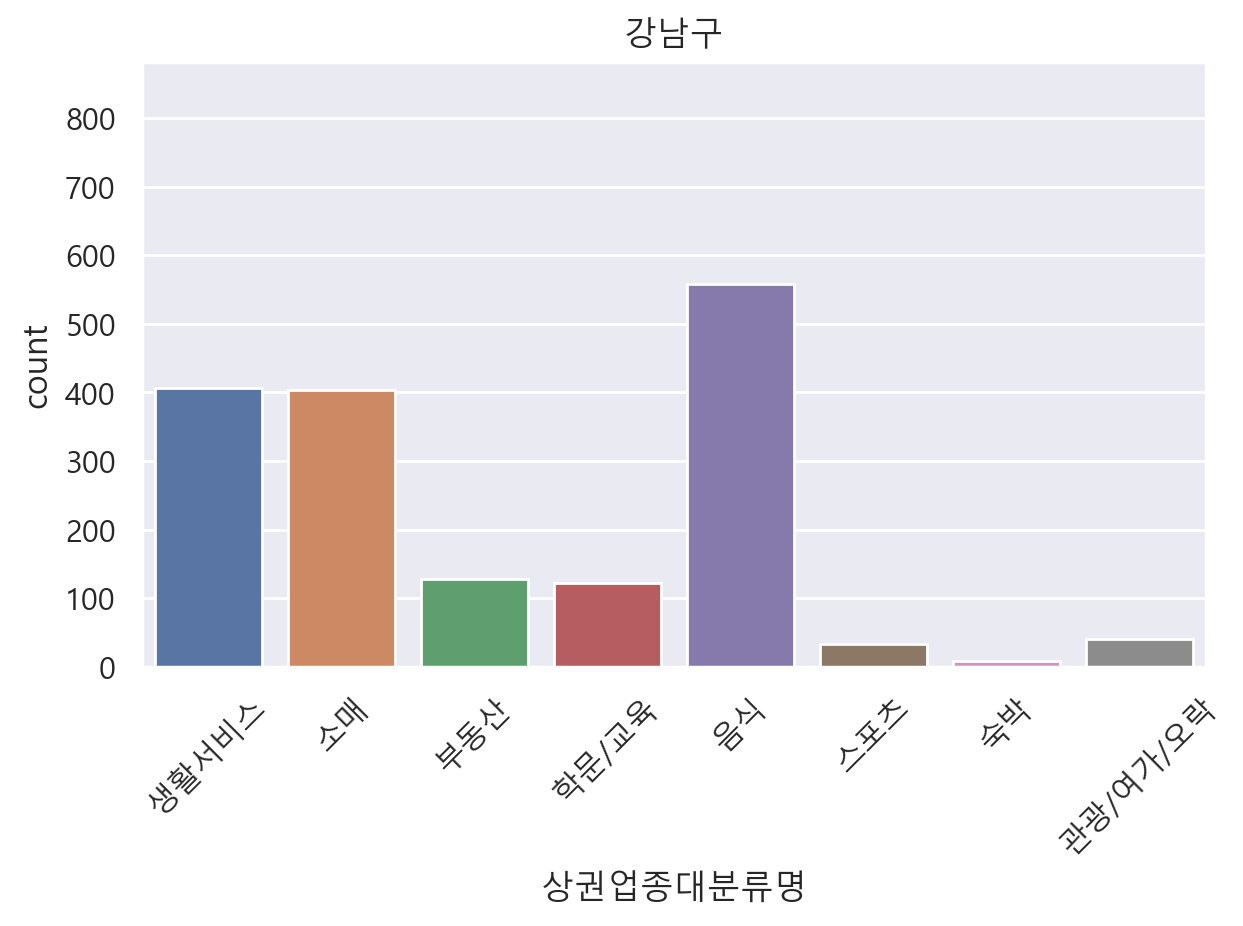

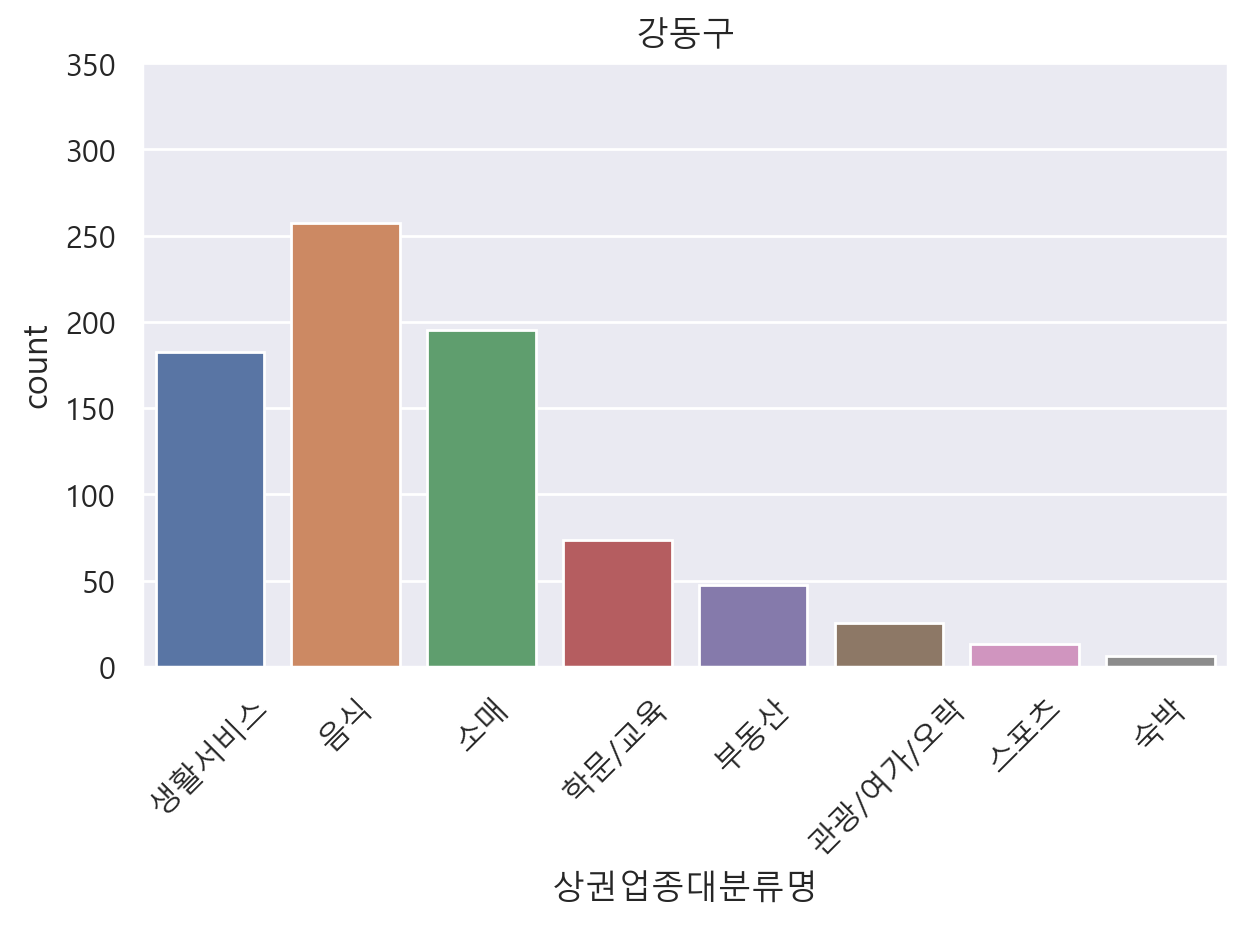

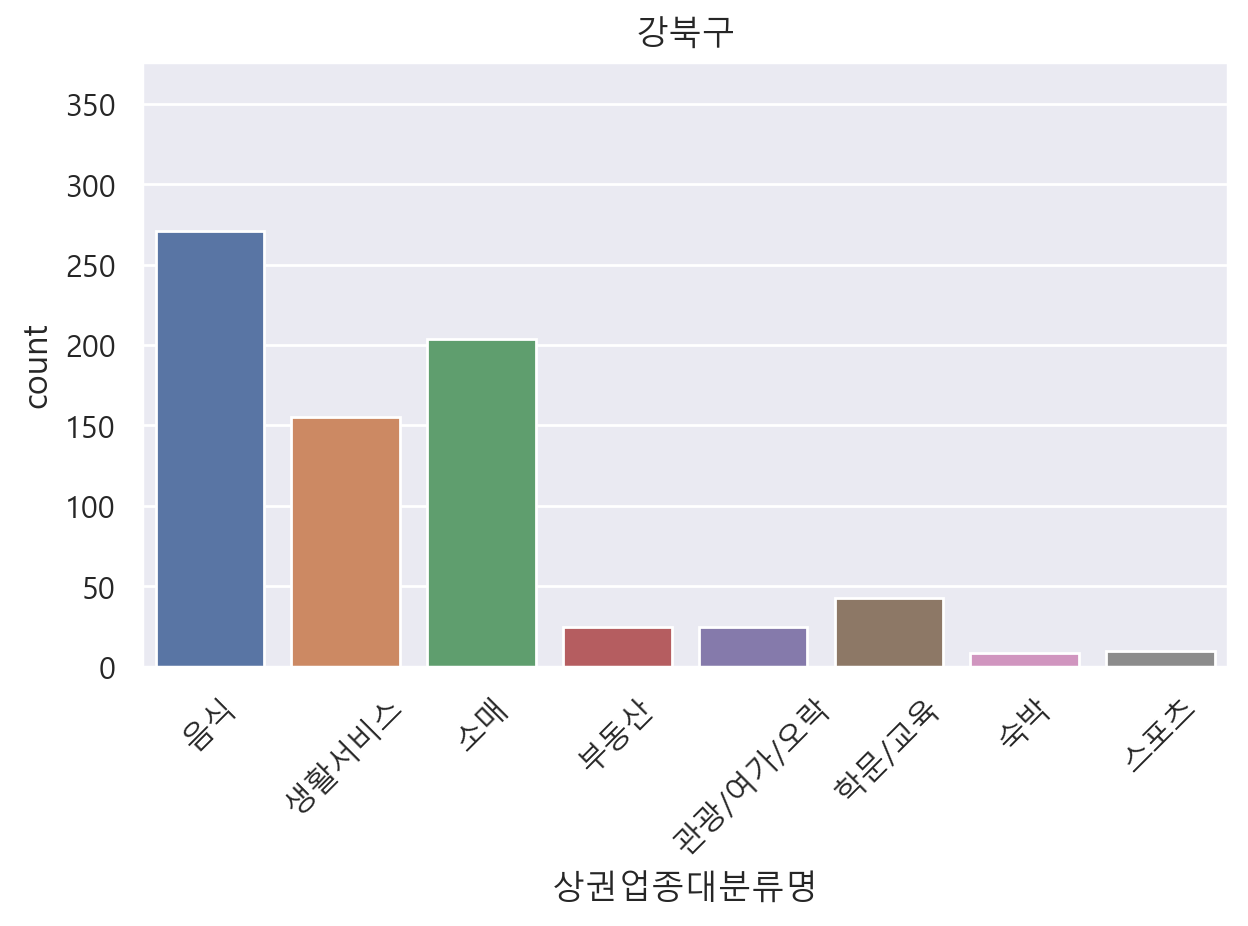

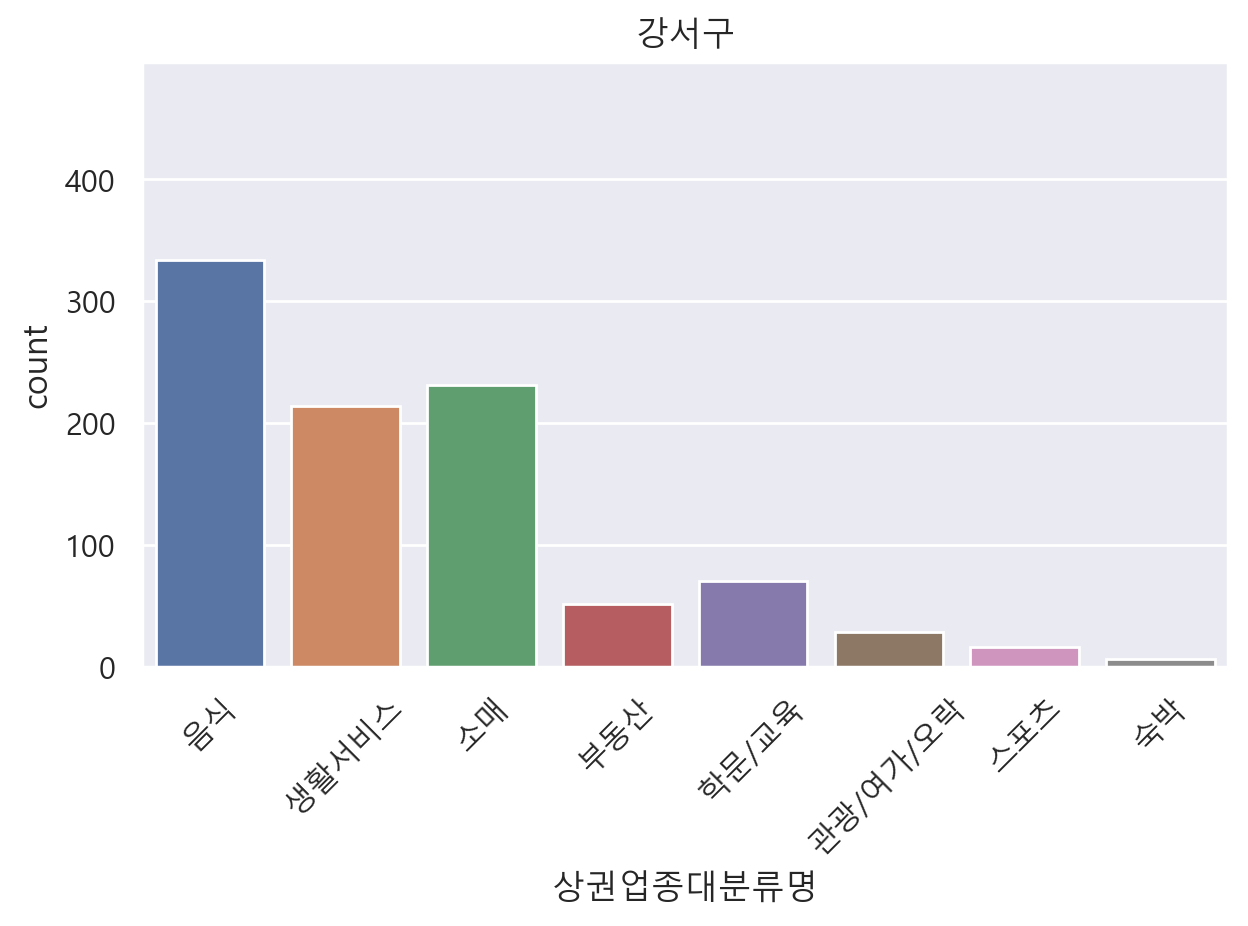

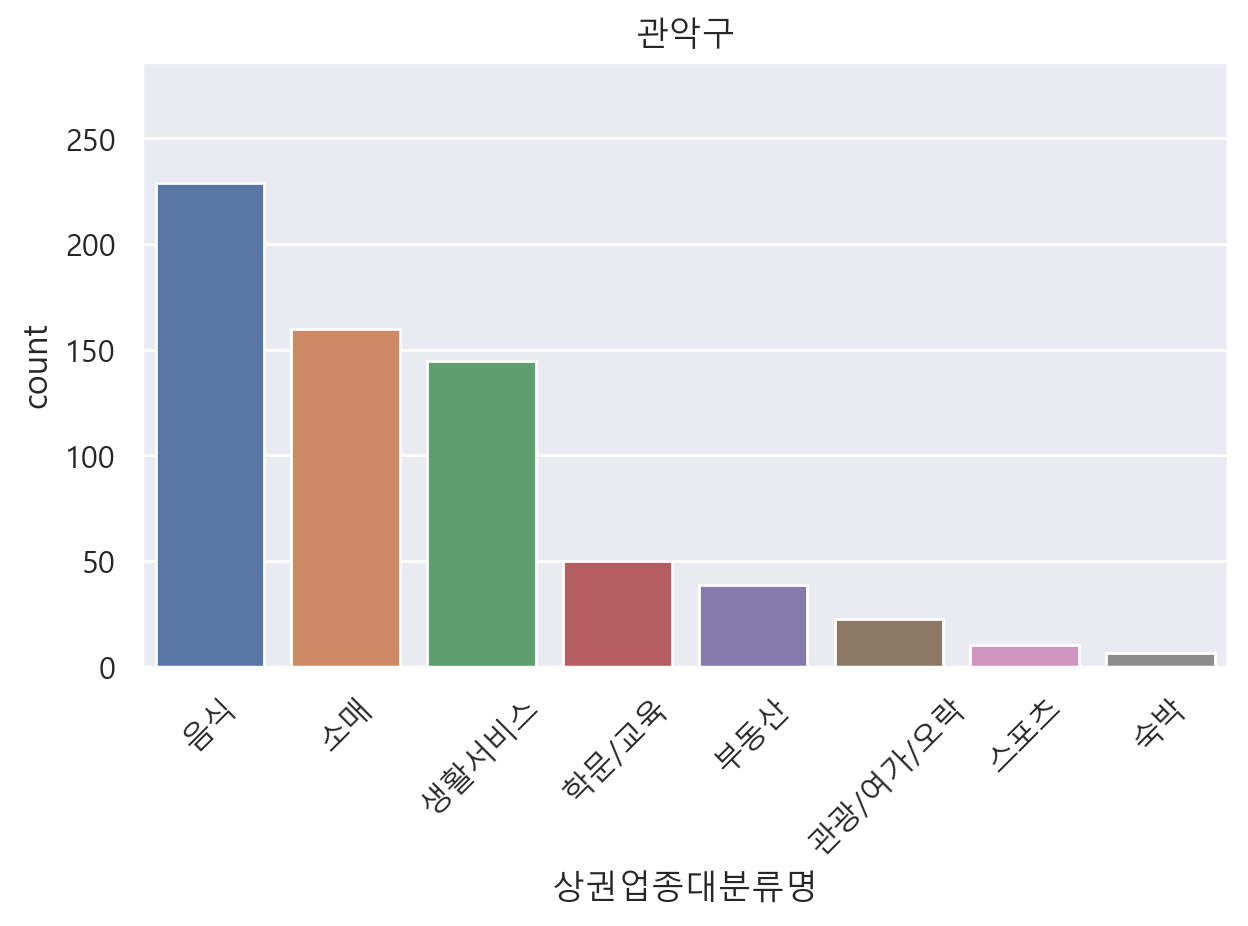

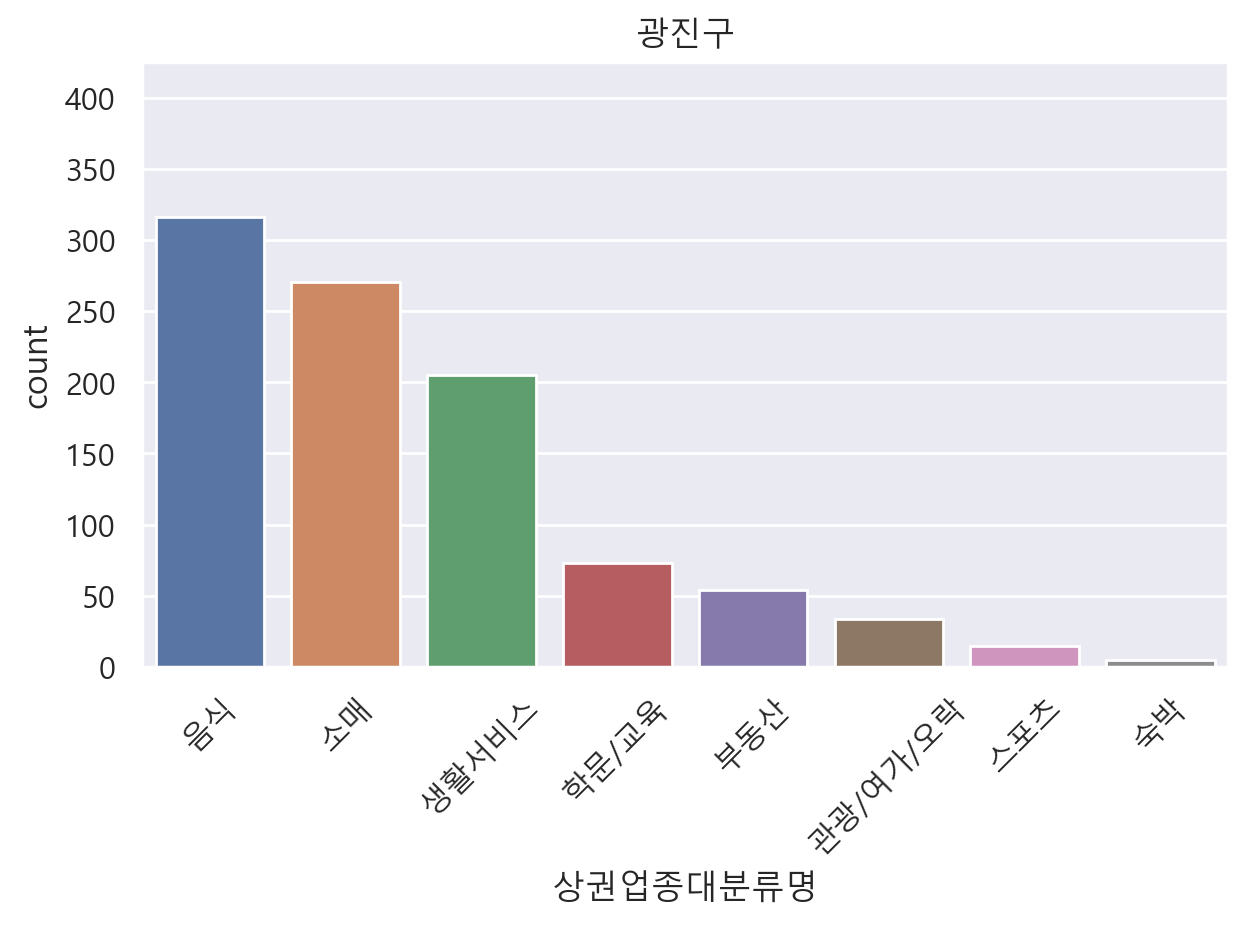

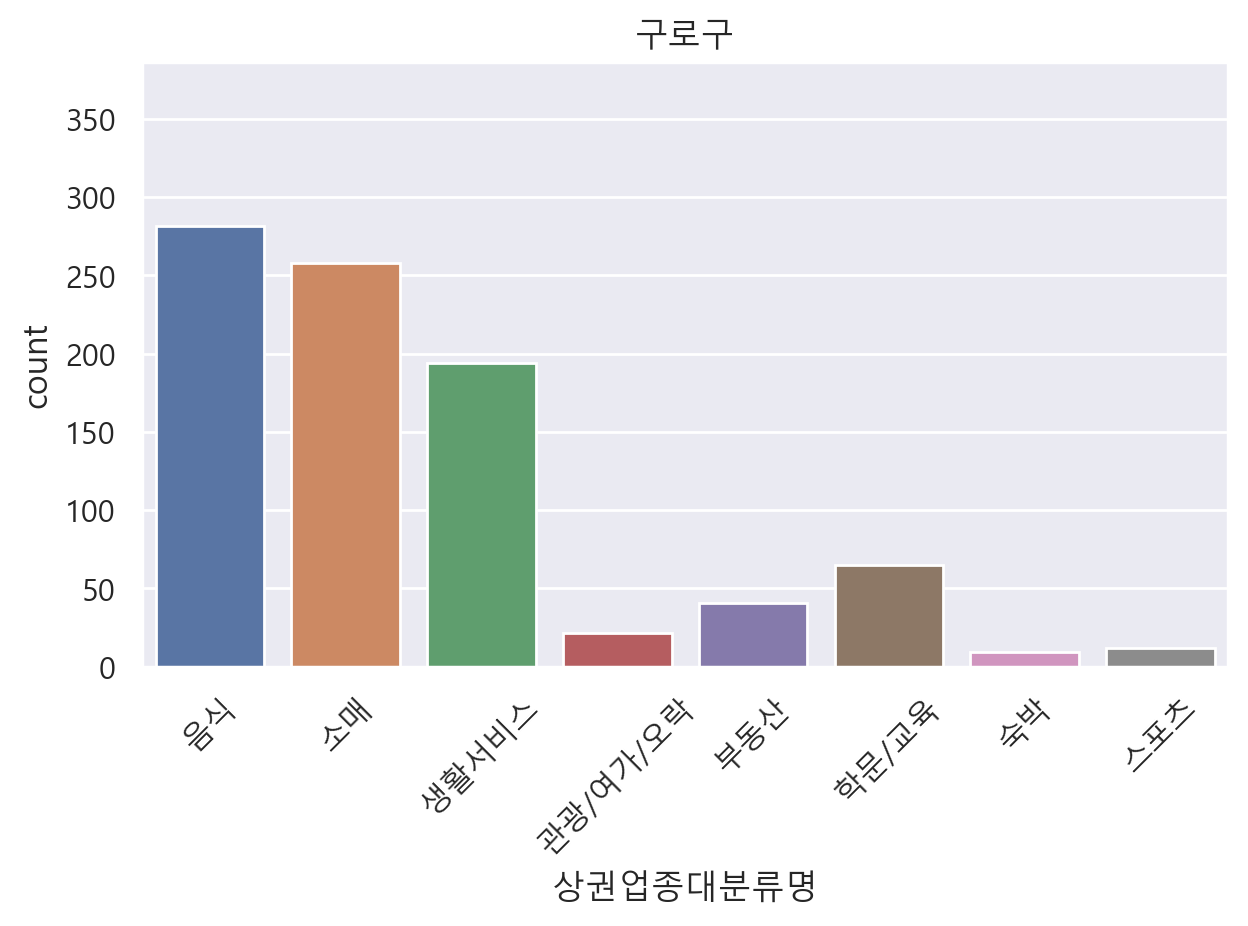

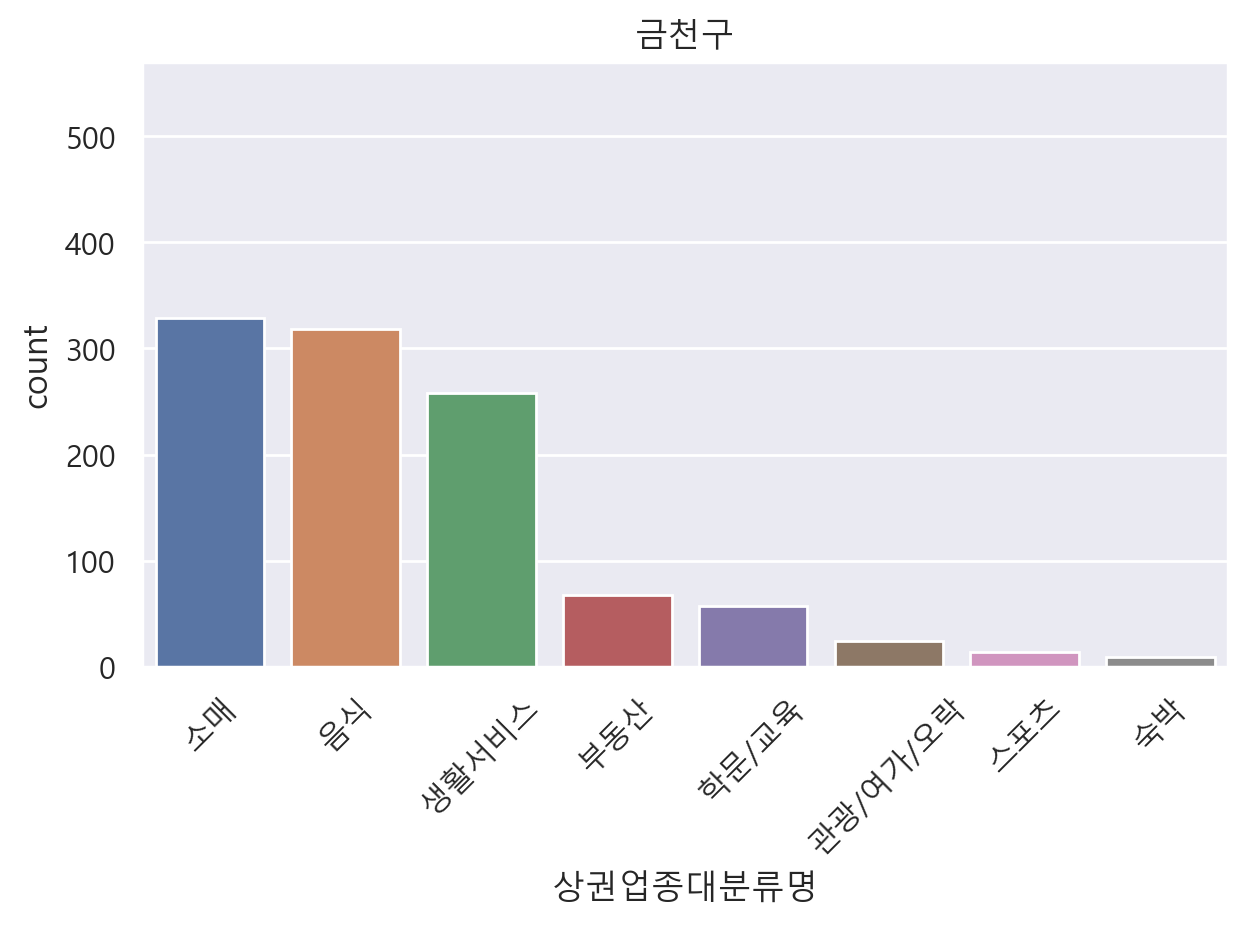

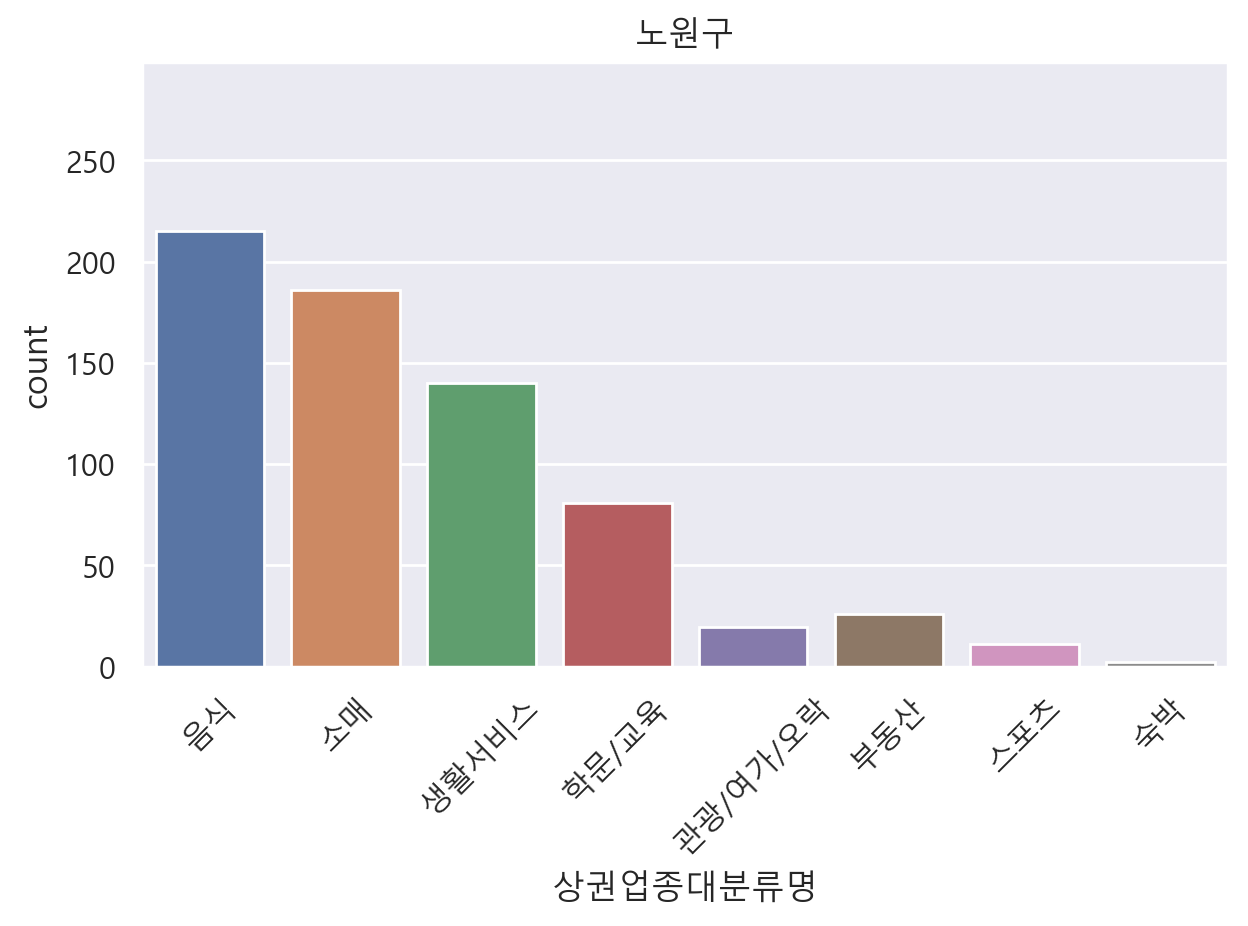

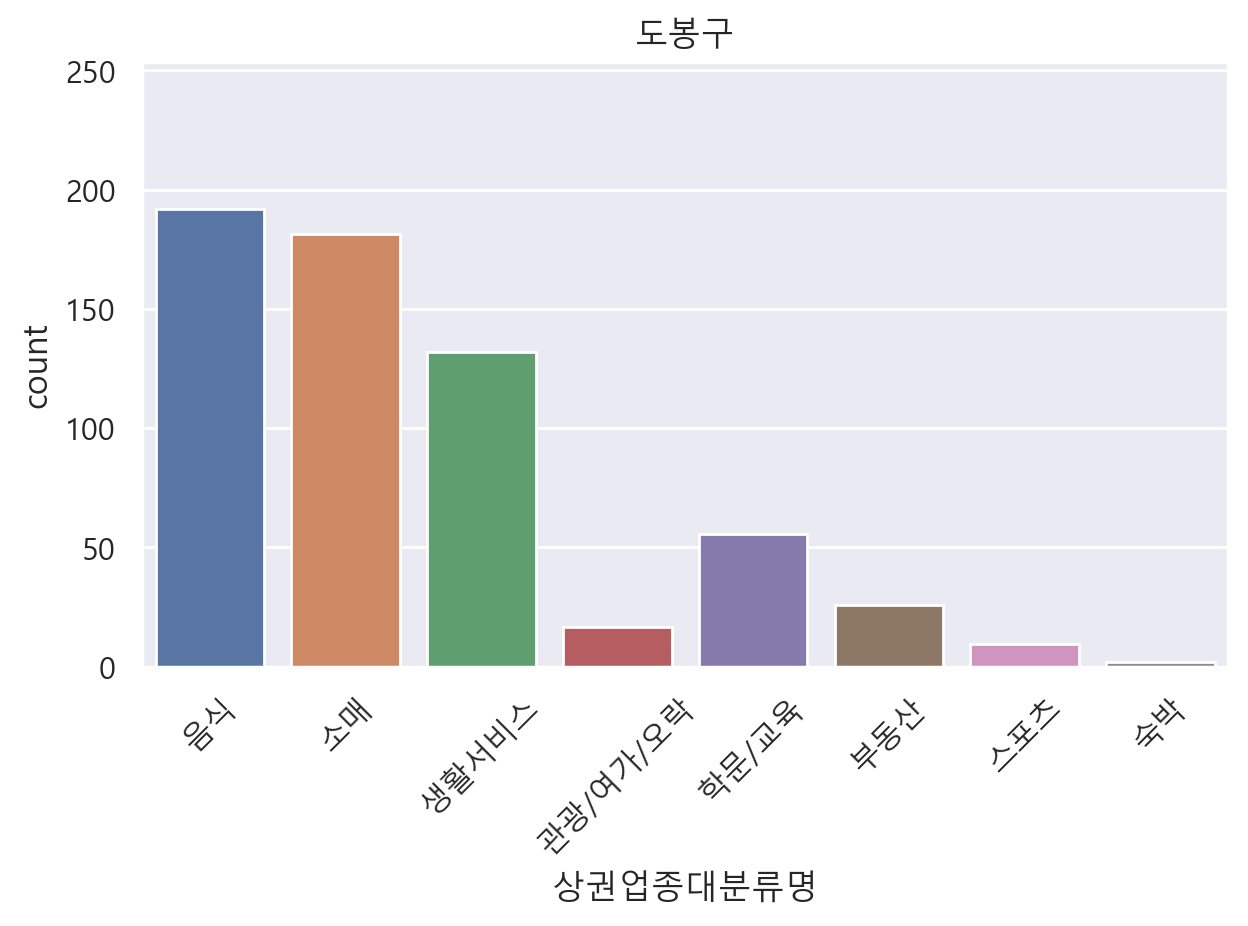

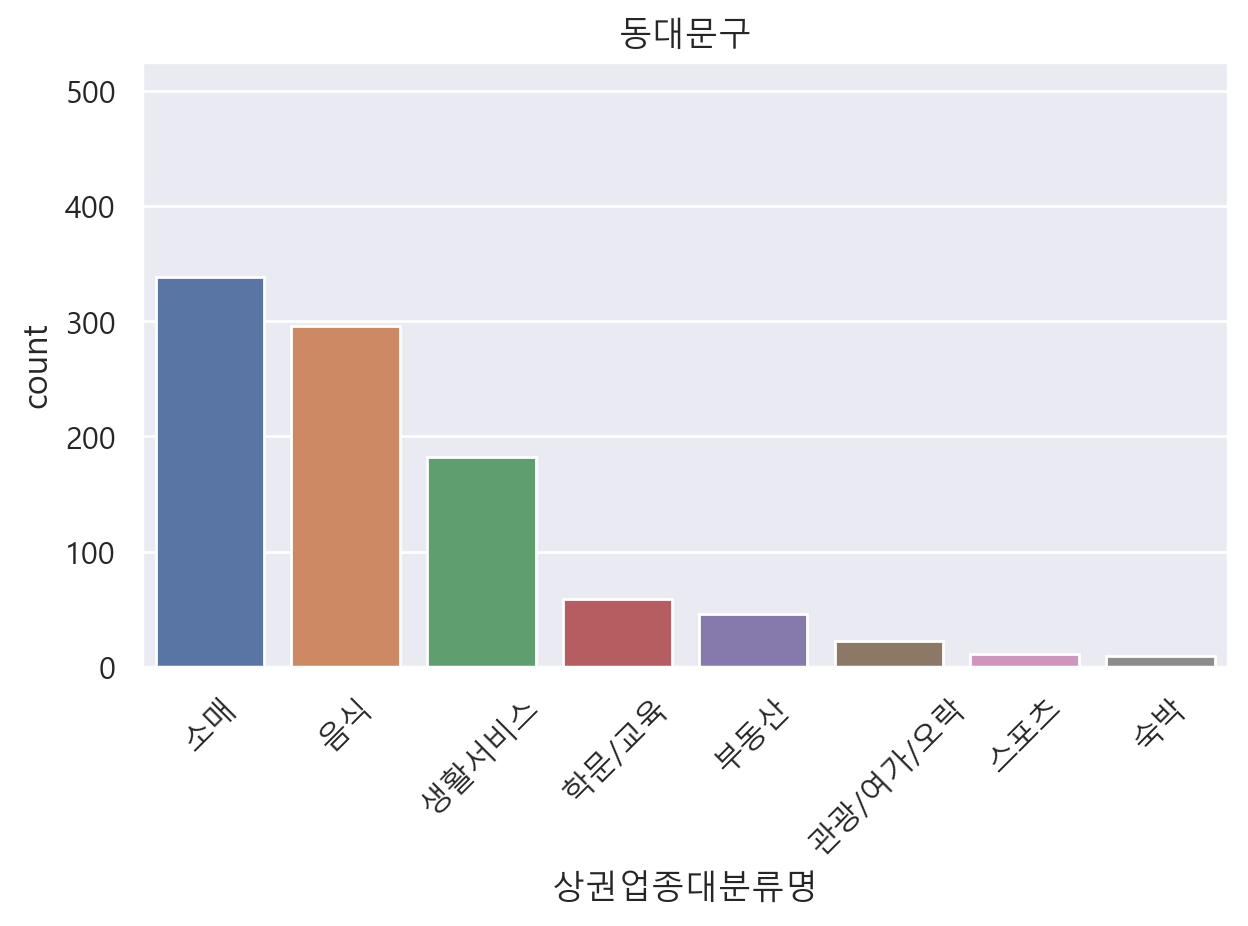

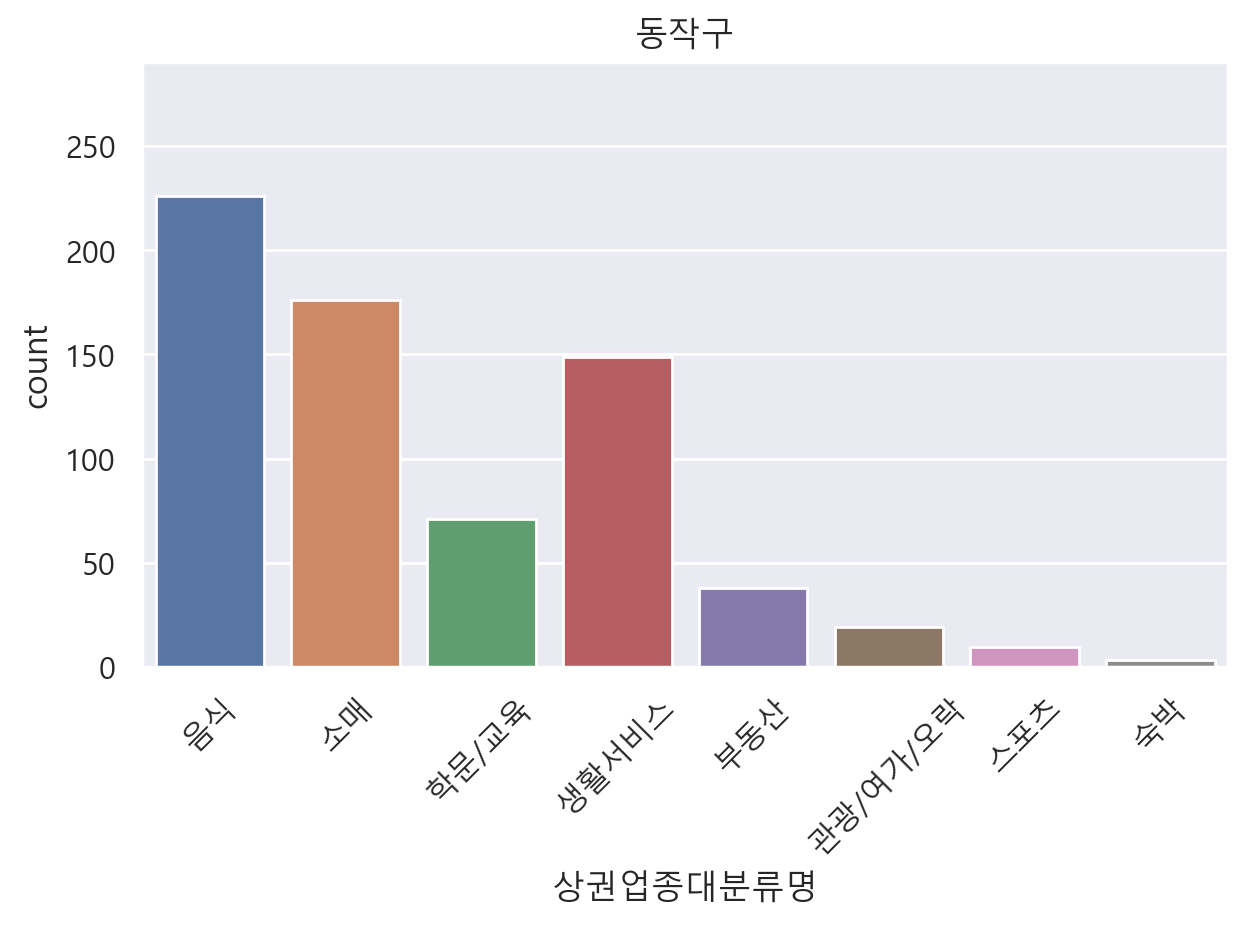

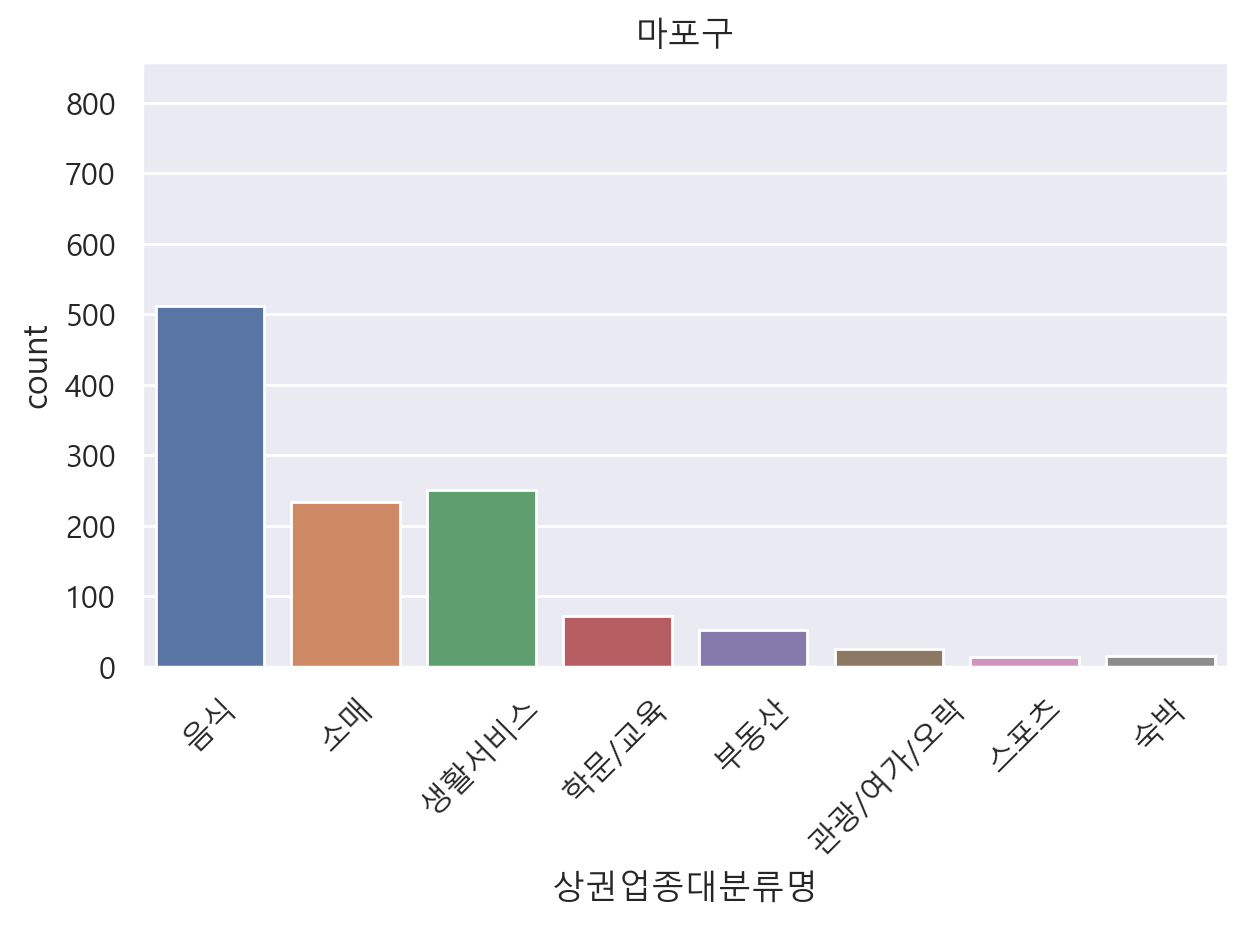

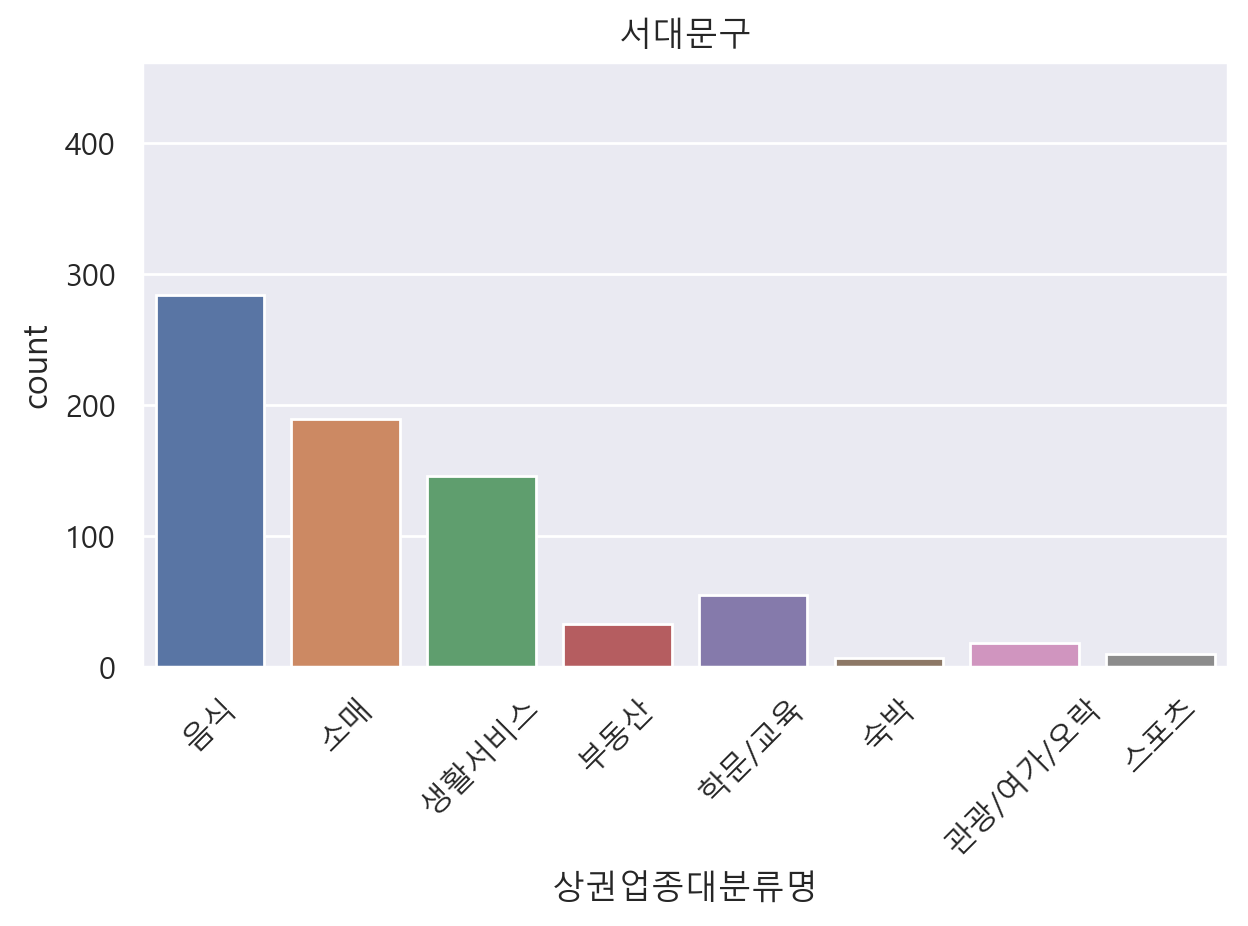

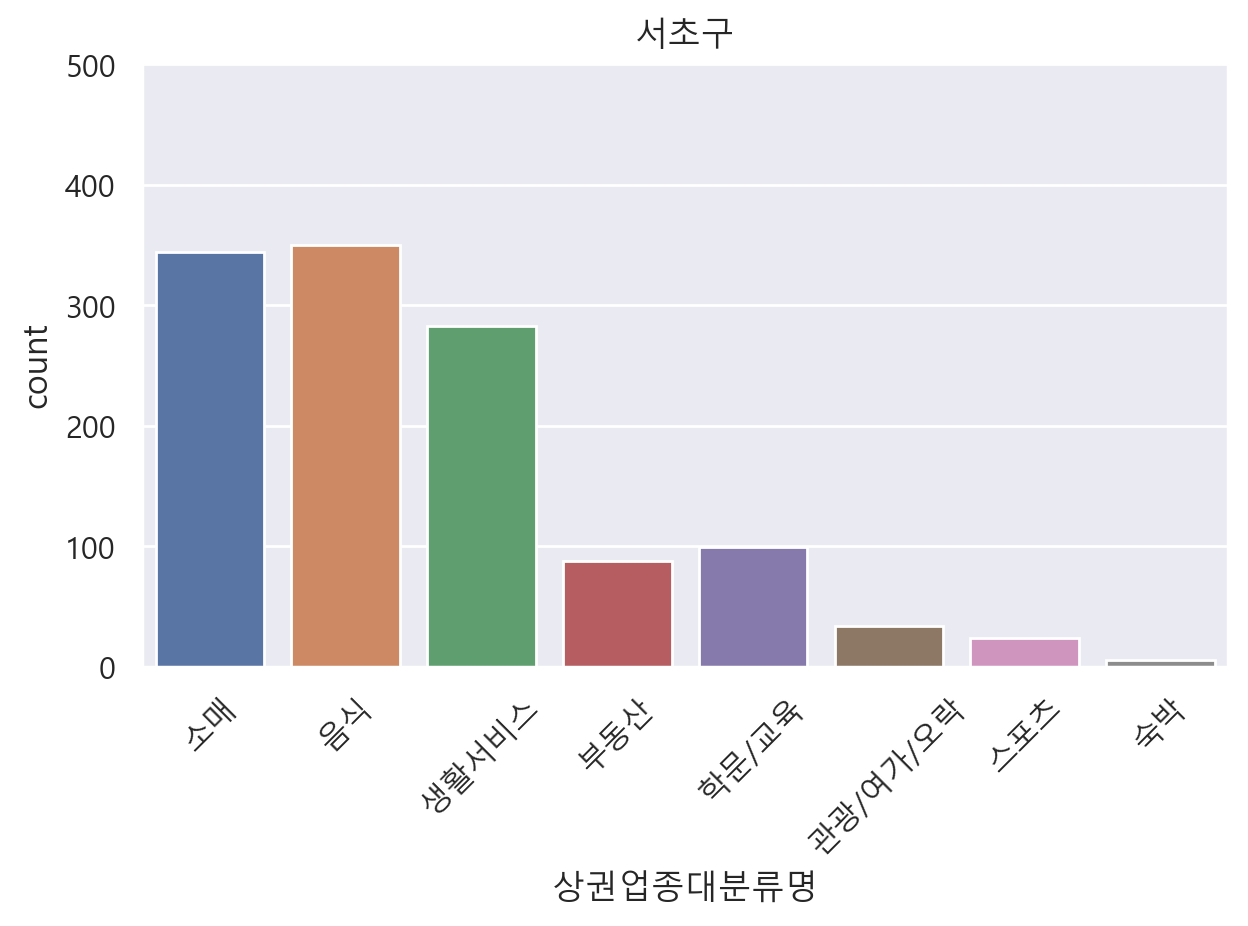

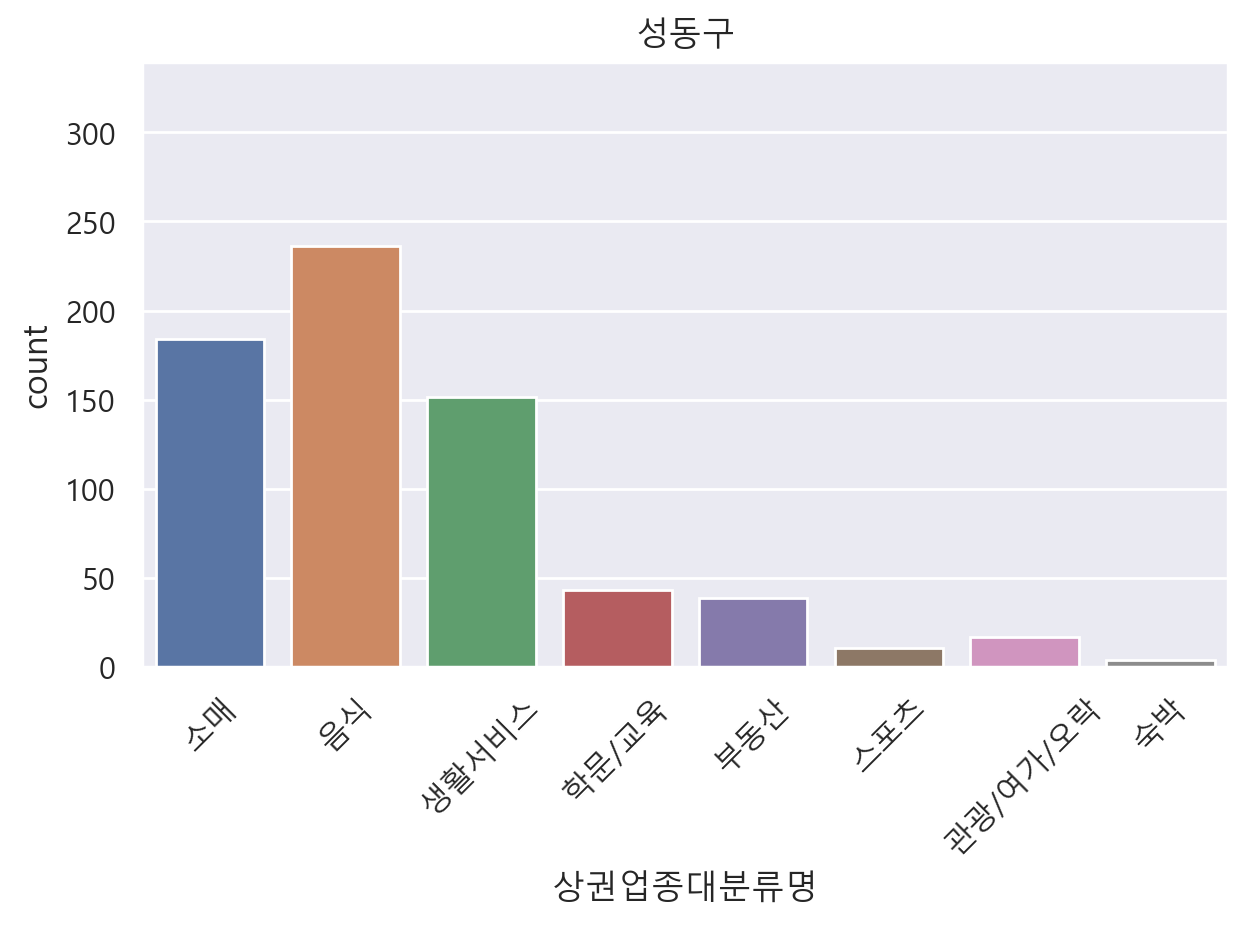

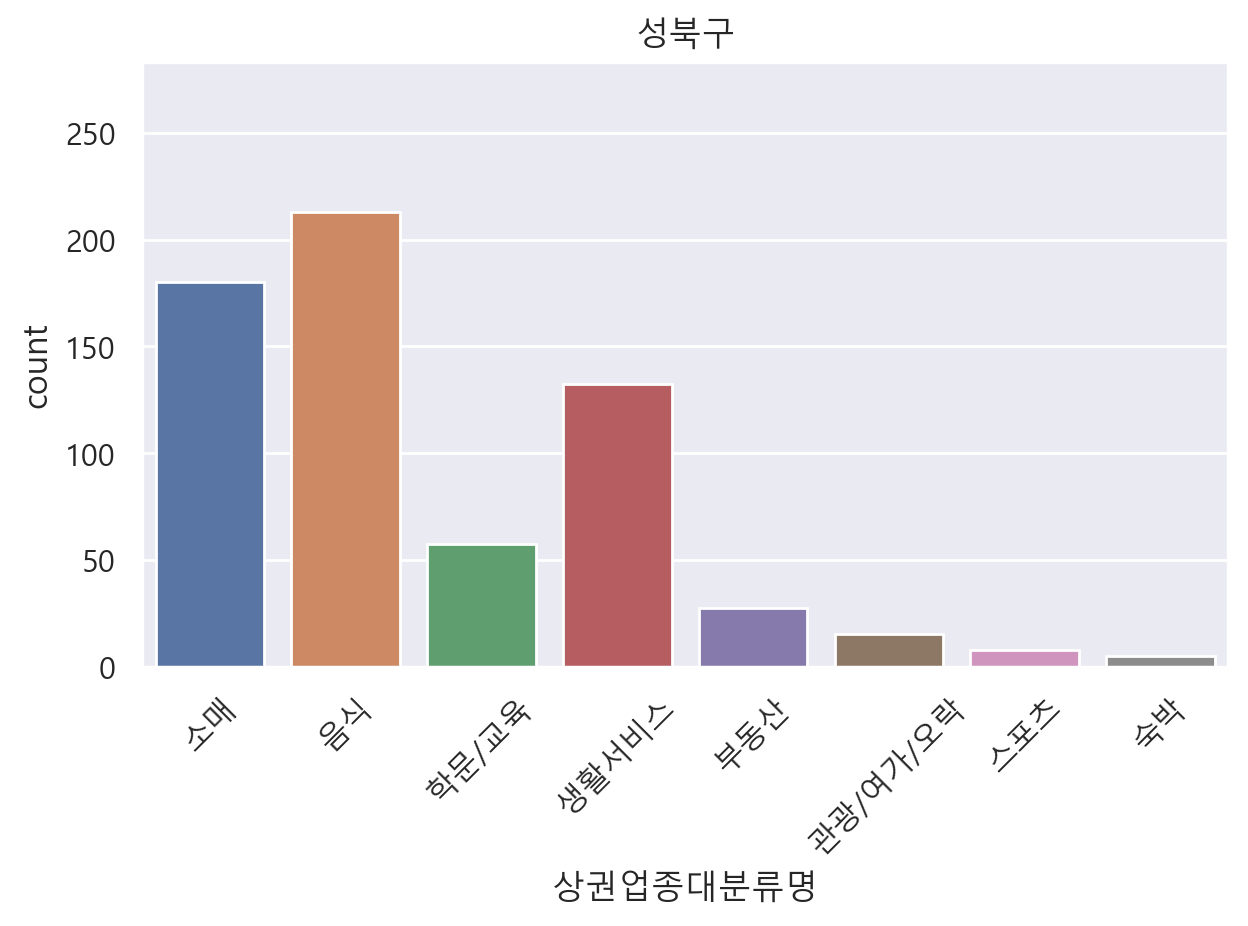

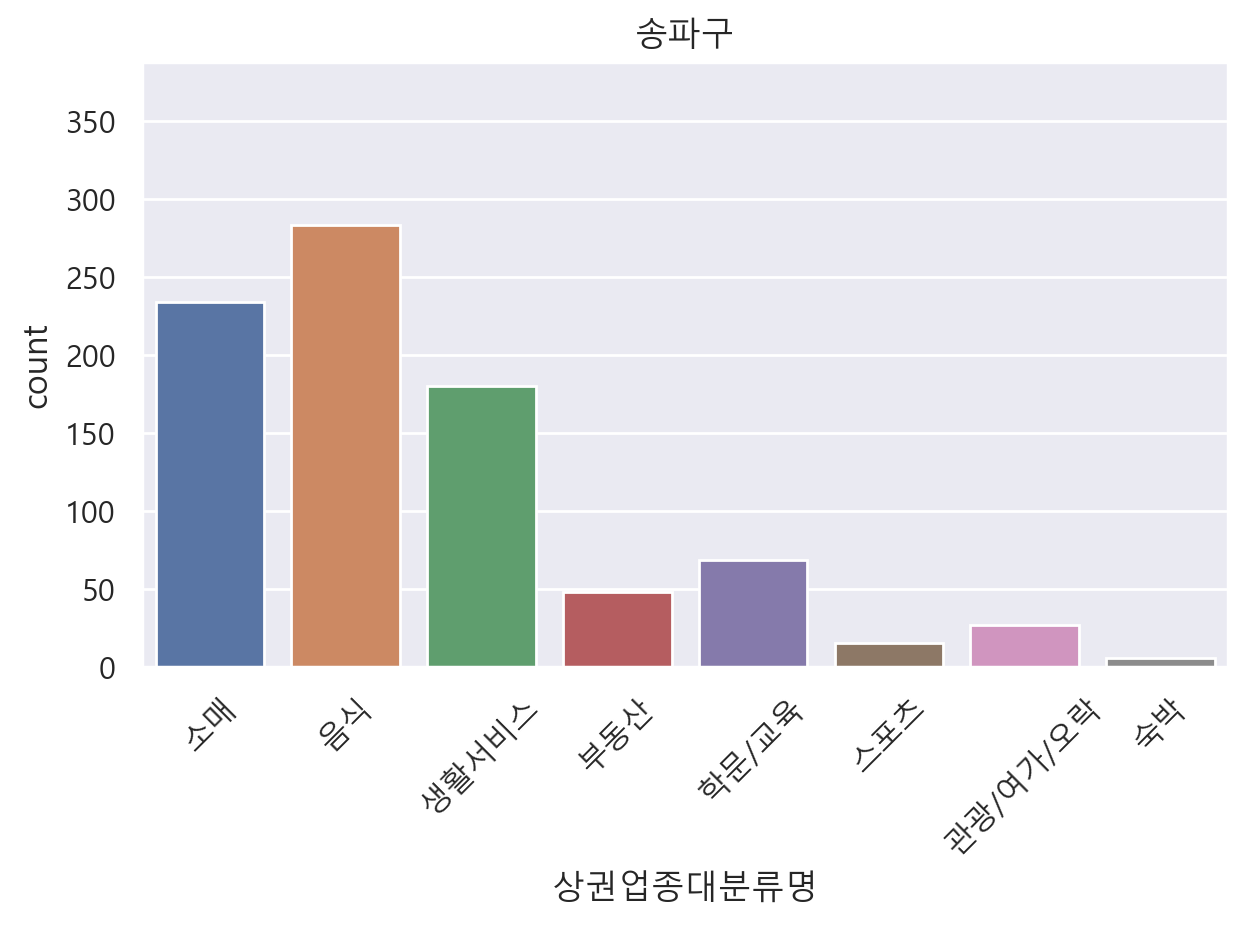

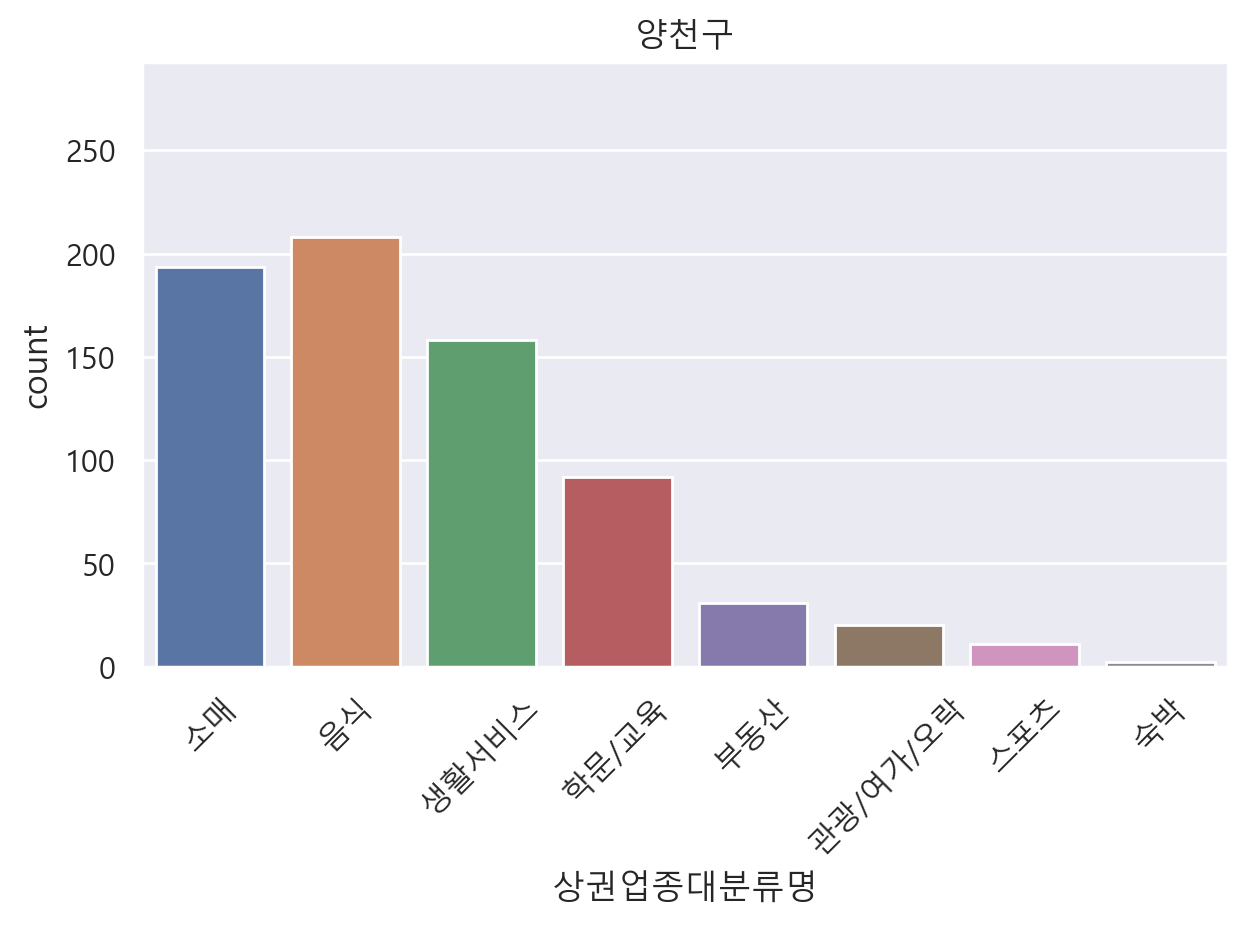

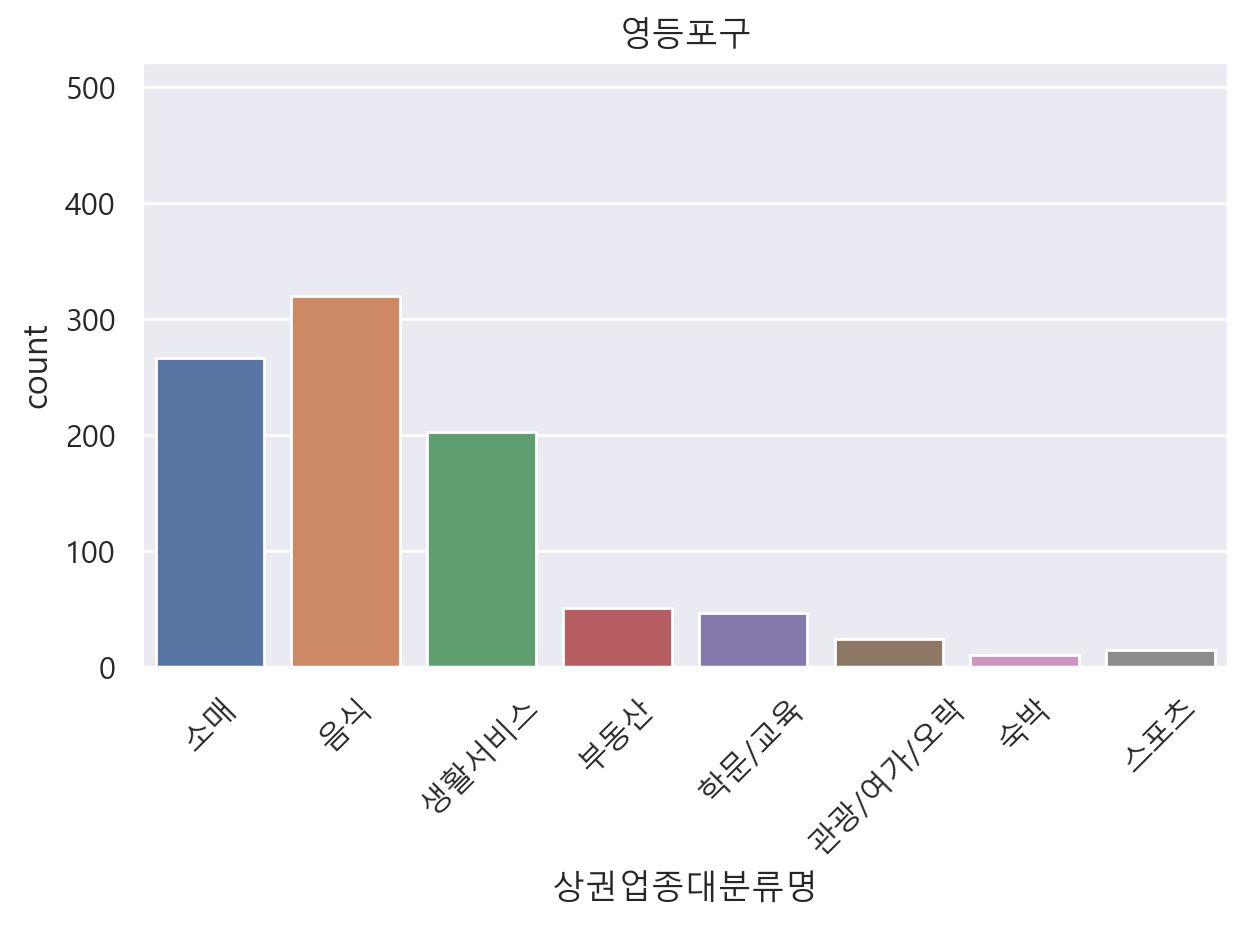

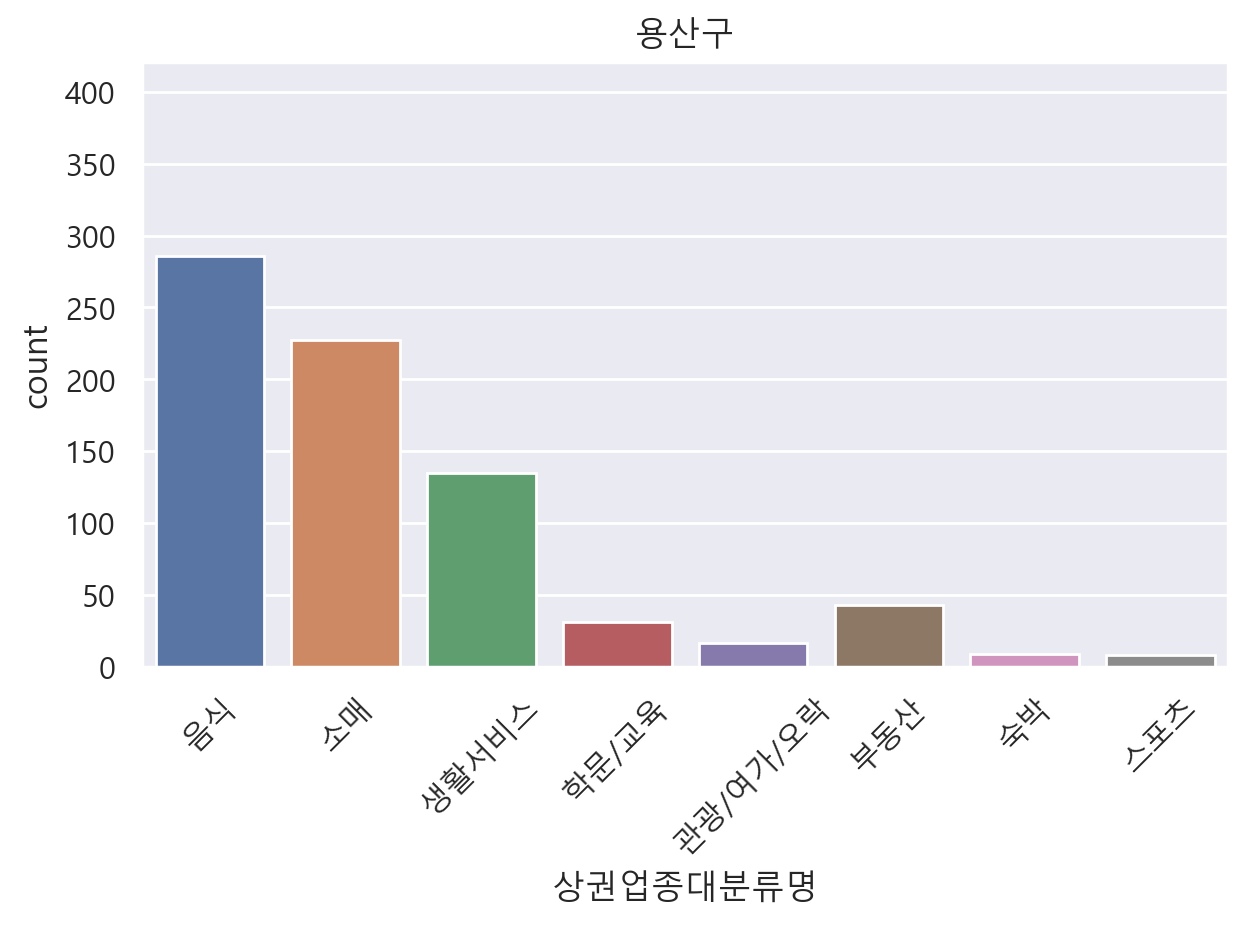

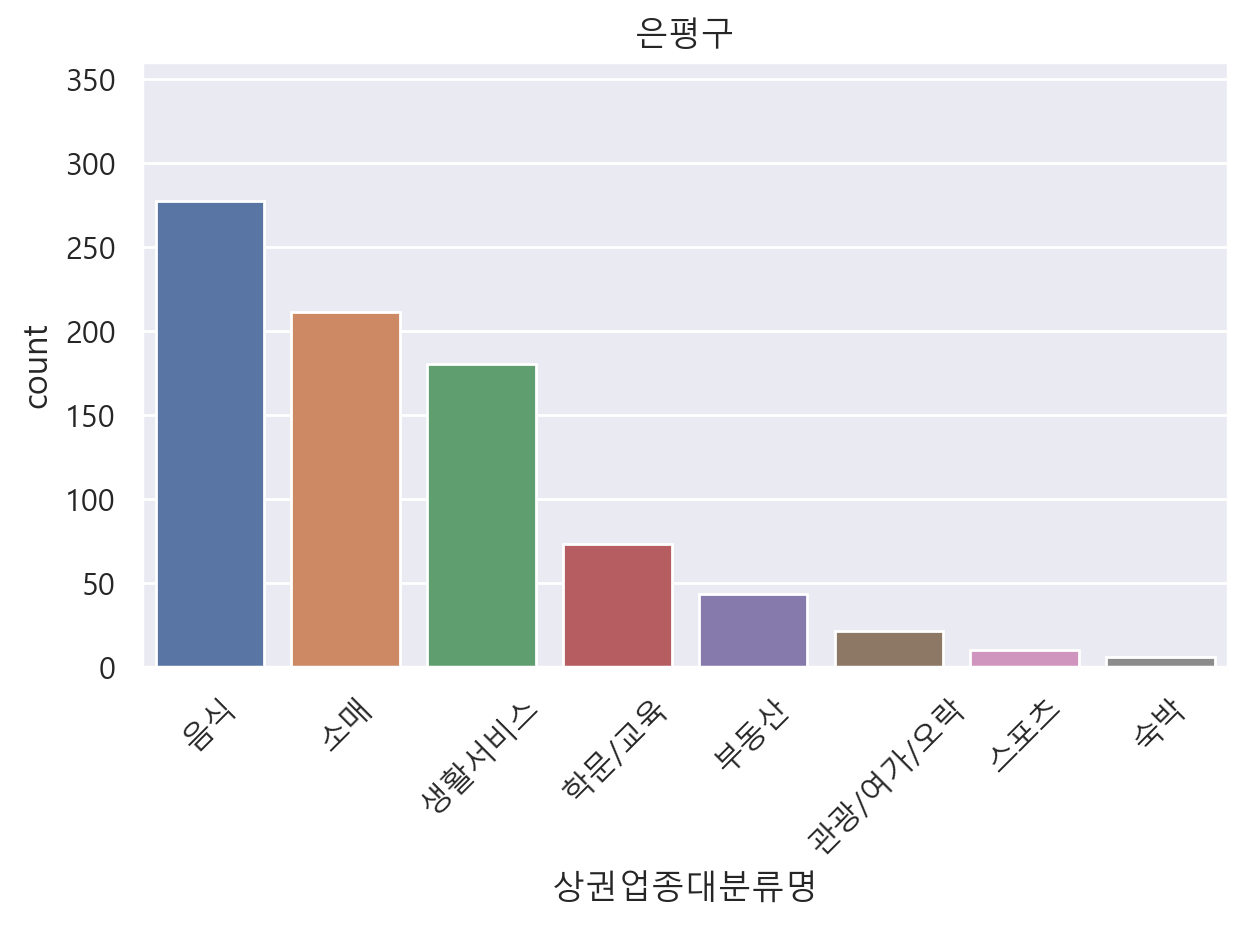

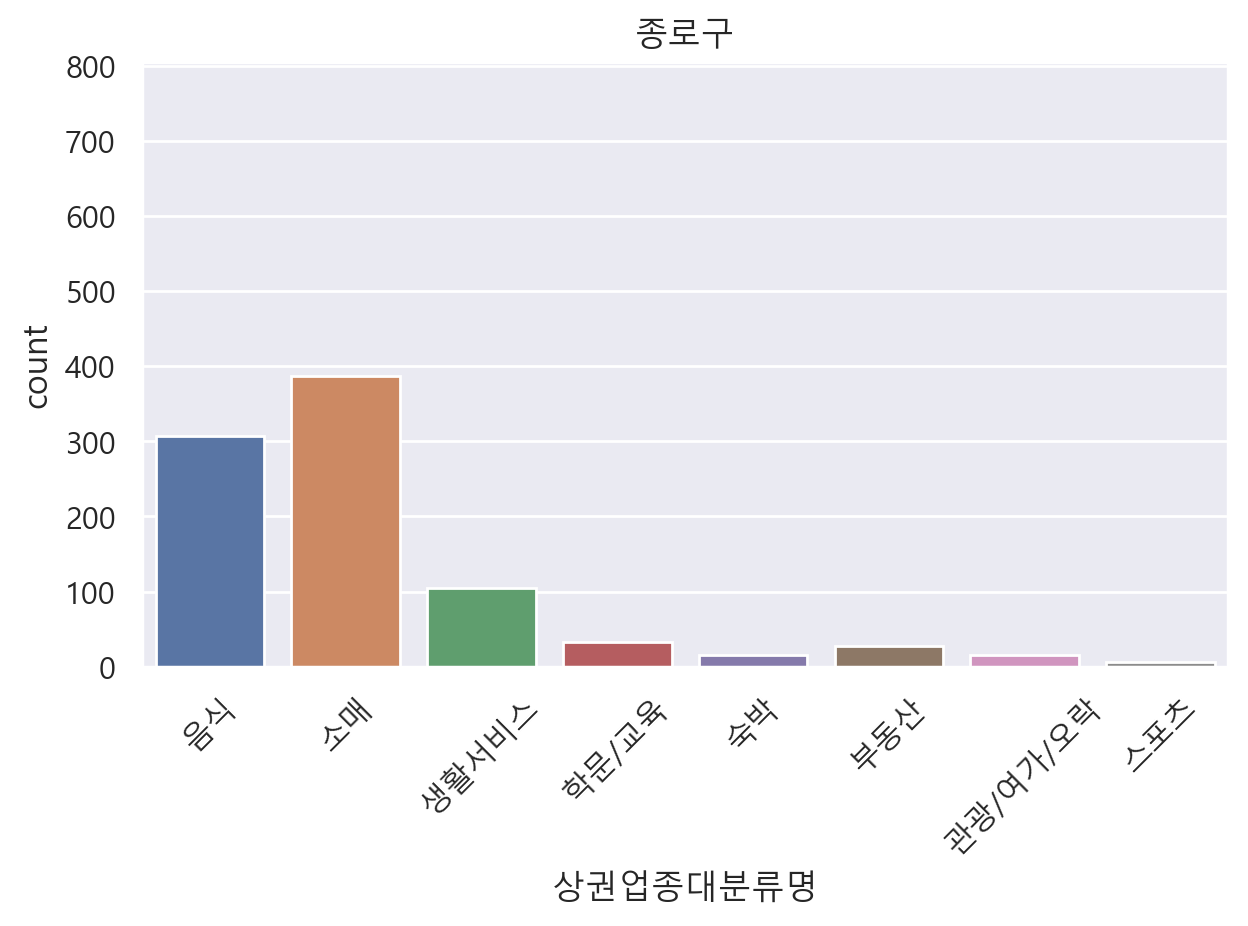

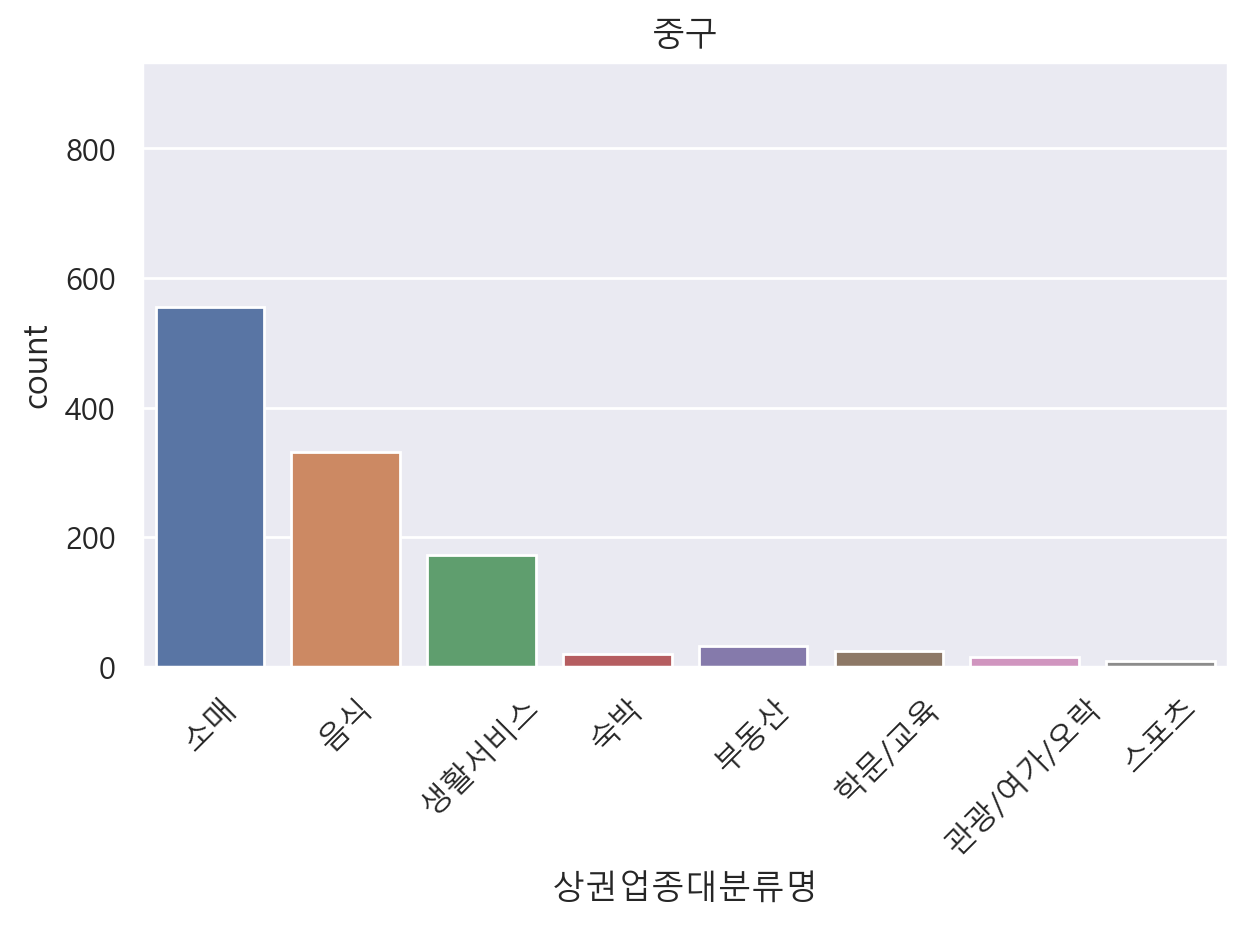

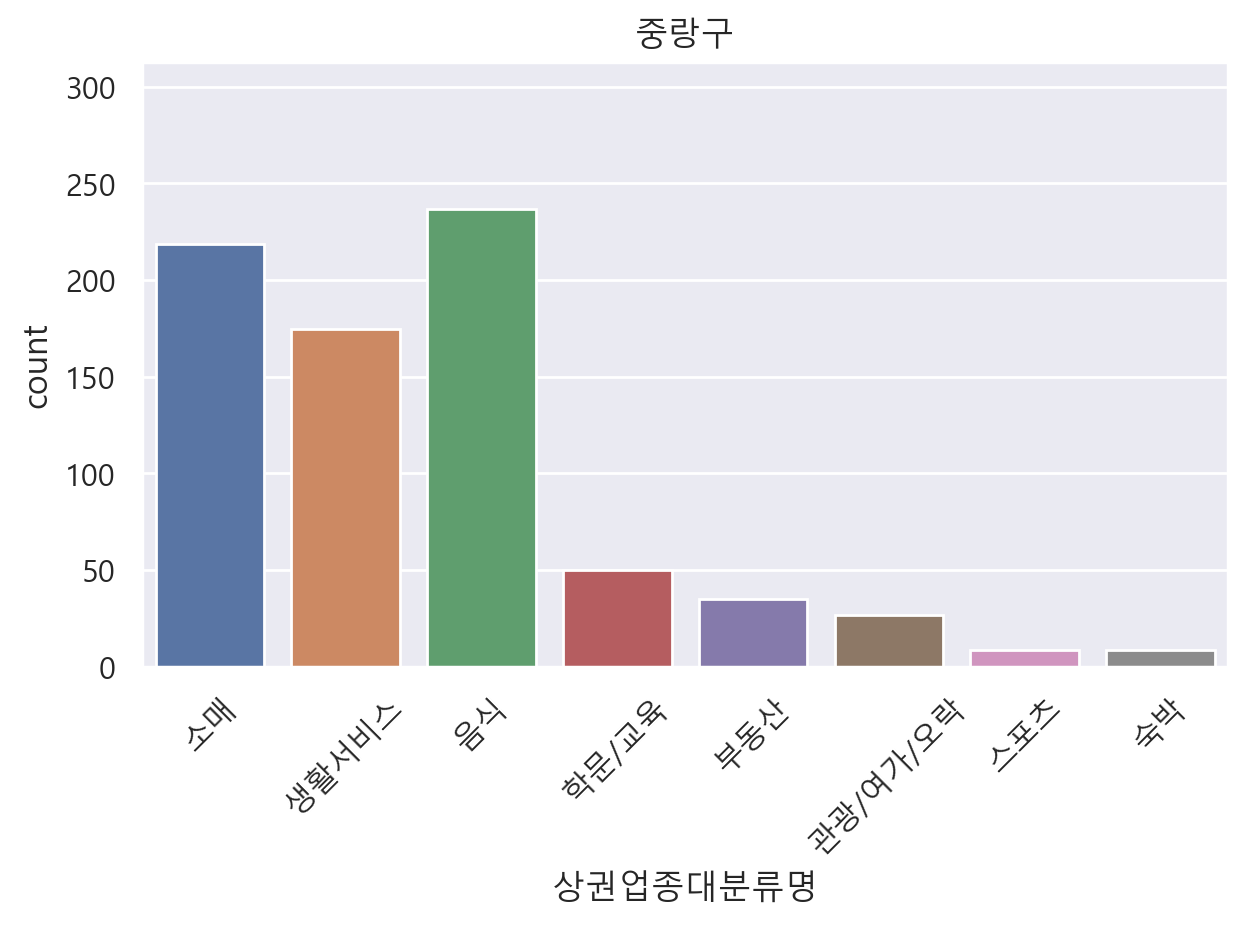

In [28]:
for gu in list(group_seoul_df['시군구명'].unique()):
    sns.barplot(x='상권업종대분류명', y='count', data = group_seoul_df.loc[group_seoul_df['시군구명'] == gu, :], errwidth=0)
    plt.xticks(rotation=45)
    plt.title(gu)
    plt.tight_layout()
    plt.savefig(f'./img/구별 상권업종대분류명 수/{gu}.png')
    plt.show()

# 강서구 동별, 상권업종대분류명별 - 상권업종중분류명

In [22]:
group_df = df.loc[df['시군구명'] == '강서구', :].groupby(['행정동명', '상권업종대분류명'], as_index=False)['상권업종중분류명'].value_counts()

In [23]:
# '가양1동', '가양2동', '가양3동', '공항동', '등촌1동', '등촌2동', '등촌3동', '발산1동',
# '방화1동', '방화2동', '방화3동', '염창동', '우장산동', '화곡1동', '화곡2동', '화곡3동',
# '화곡4동', '화곡6동', '화곡8동', '화곡본동'
gu = '우장산동'

# '관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'
store_type = '학문/교육'

condition = (group_df['행정동명'] == gu) & (group_df['상권업종대분류명'] == store_type)

tmp_df = group_df.loc[condition, :]

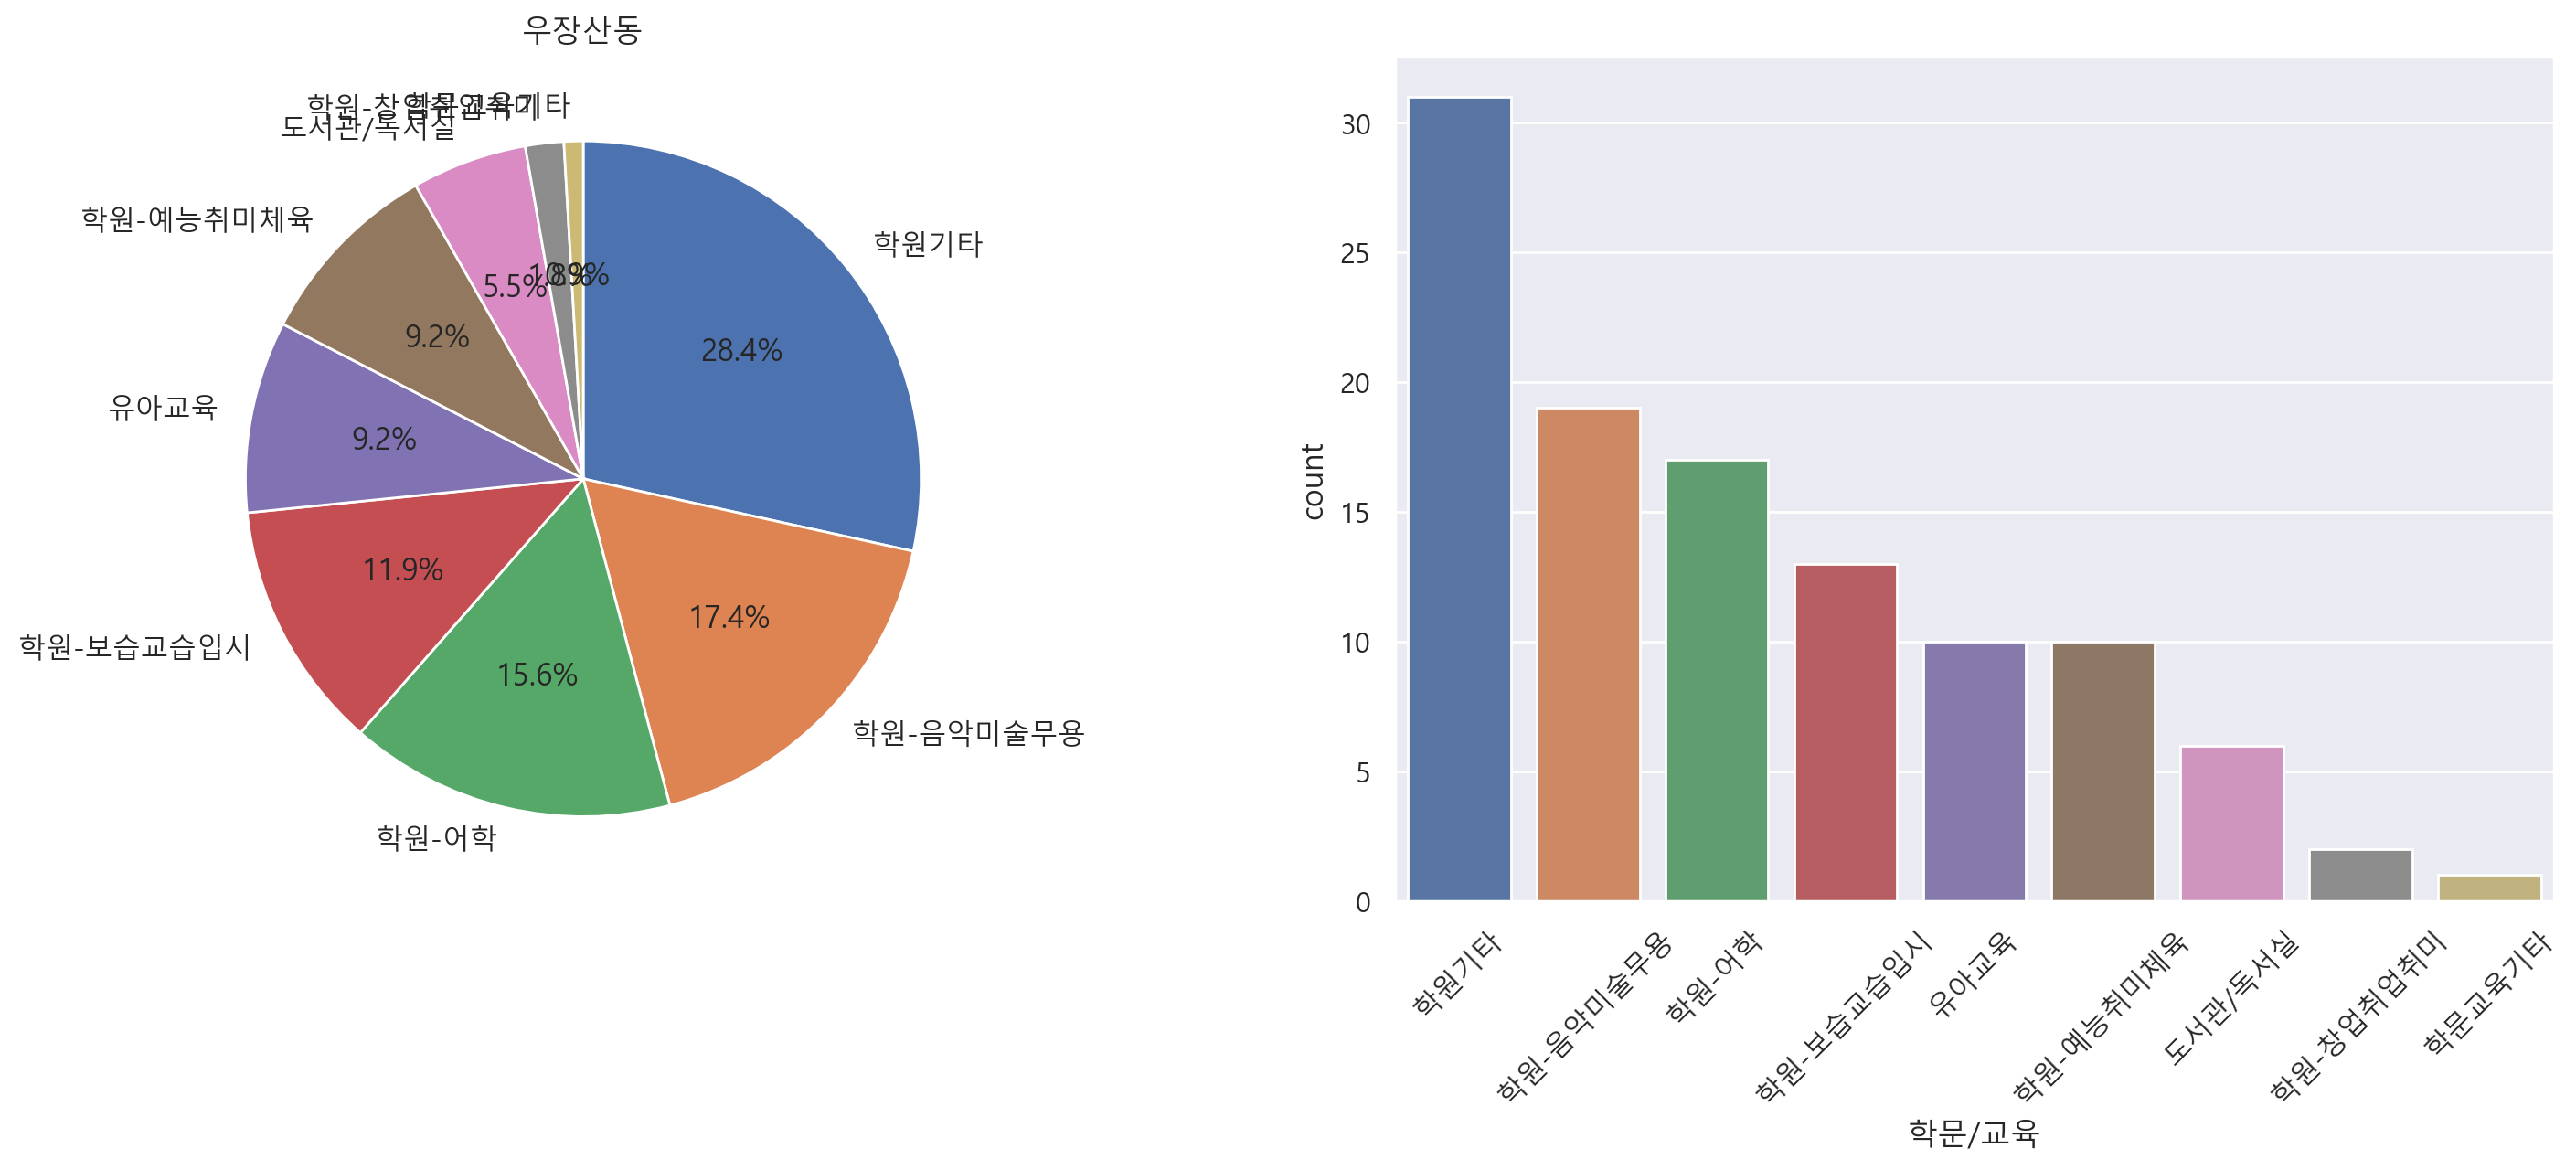

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.pie(tmp_df['count'], labels=tmp_df['상권업종중분류명'], autopct='%.1f%%', startangle=90, counterclock=False)
plt.title(gu)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='상권업종중분류명', y='count', data=tmp_df, errwidth=0)
plt.xlabel(store_type)
plt.xticks(rotation=45)
plt.show()

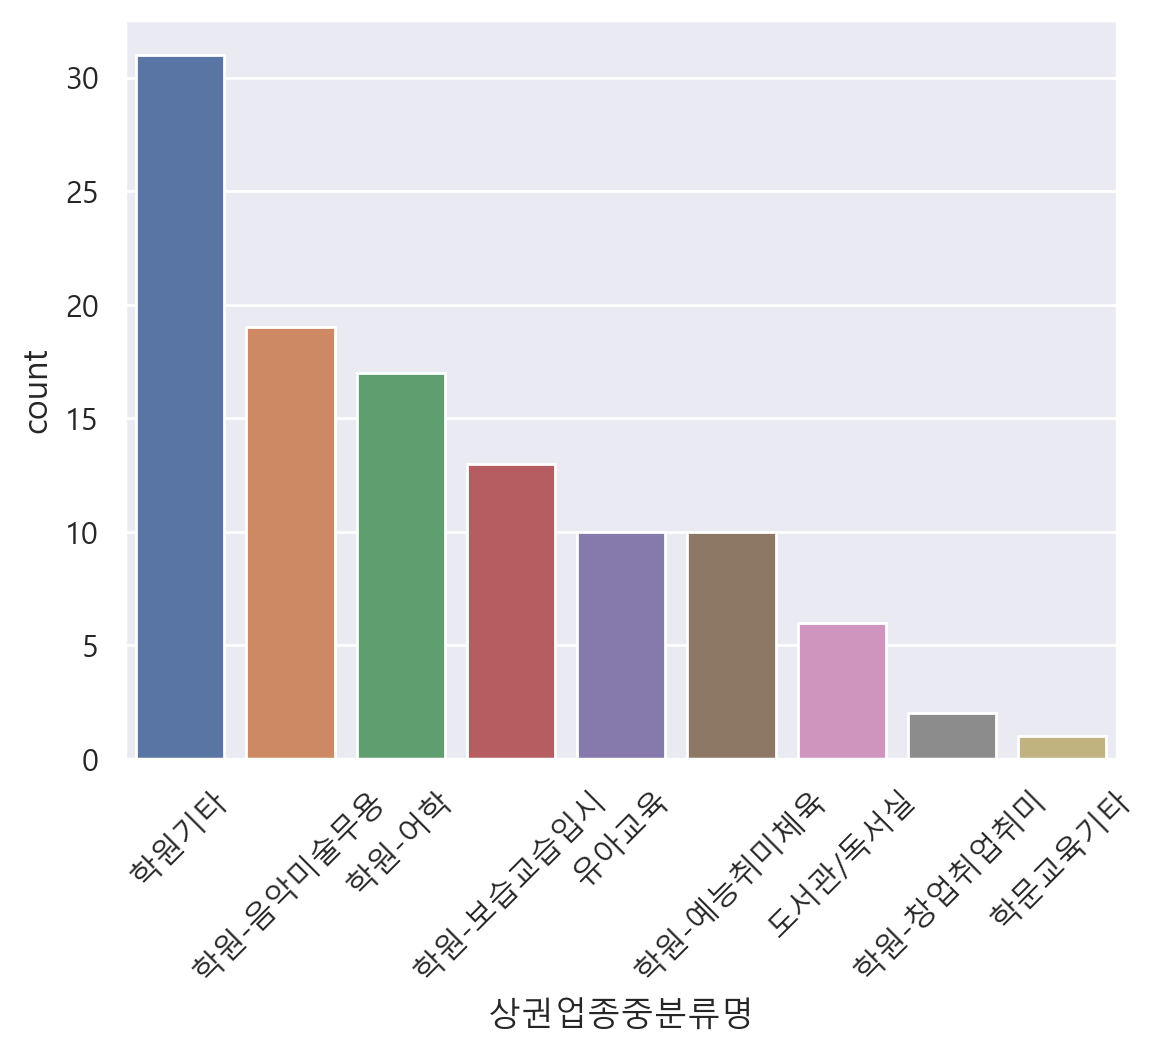

In [25]:
sns.barplot(x='상권업종중분류명', y='count', data=tmp_df, errwidth=0)
plt.xticks(rotation=45)
plt.show()